#  Input / Output

### pickle file 

Read the pickle file and load it into the dataframe (to_pickle)

In [16]:
import pandas as pd
original_df=pd.DataFrame({
    'foo':range(5),
    'bar': range(5,10)
})
original_df

,foo,bar
0,0,5
1,1,6
2,2,7
3,3,8
4,4,9


In [17]:
pd.to_pickle(original_df, 'dumpped.pkl')
unpickle=pd.read_pickle('dumpped.pkl')
unpickle

,foo,bar
0,0,5
1,1,6
2,2,7
3,3,8
4,4,9


### Flat file

##### table

parameters the read_csv can take 
file path, <br>
<b>sep</b> (character or regex pattern to treat as a delimiter)<br>
Anyone of these (Either sep or delimiter is fine)<b>
<b>delimiter</b> <br>

<b>header</b> -> Row numbers containing column labels and marking the start of the data. By default behavior is to infer the column names: if no names are passed the behavior is identical to header= 0 and column names are inferred from the first line of the file, if column names are passed explicitly to names then the behaviour is identical to header = None. header=0 denotes the first line of data rather than the first line of the file. <br>

<b>names</b> -> Sequence of column labels to apply. If the file contains a header row, then you should explicitly pass header = 0 ,to overide the column names. Duplicates in this list are not allowed.<br>

<b>index_col</b> -> Columns to use as row labels, deonted either by column labels or column indices. If a sequence of labels or indices is given. 
Note: index_col = False, can be used to force pandas to not use the first column as the index.<br>

<b>dtype</b>

<b>skiprows</b> -> Line numbers to skip (0 - indexed) or number of lines to skip at the start of the file. If callable, the callable function will be evaluated against the row indices, returning True, if the row should be skipped and False otherwise

<b>nrows</b> -> Number of rows of file to read. Useful for reading pieces of large files.

<b>Verbose</b> -> Indicates number of NA values placed in non-numeric columns.

<b>na_values</b> -> Using this we can define a list of values that to be treated as missing values.

<b> na_filter </b> -> This kwarg is by default set to True, indicating that, while reading the dataframe, if encounter any missing value, pandas will replace it with na. If this parameter is set to False, then the missing values will not be automatically replaced with NaN, and they will remain as they are in the Data frame

<b>

In [18]:
import pandas as pd
import numpy as np
my_dataset=np.random.randint(1,100,30).reshape(5,6)  # 5 rows and 6 columns
my_dataset

array([[25,  3,  4, 63, 30, 85],
       [61, 78, 45, 93, 23, 14],
       [90, 52, 23, 32, 41, 77],
       [89, 46,  3, 98,  3, 67],
       [44, 35, 32, 83, 23, 12]])

In [19]:
df=pd.DataFrame(my_dataset)
df

,0,1,2,3,4,5
0,25,3,4,63,30,85
1,61,78,45,93,23,14
2,90,52,23,32,41,77
3,89,46,3,98,3,67
4,44,35,32,83,23,12


In [20]:
df.to_csv("read_csv_params_manipulation.csv")

In [21]:
#When we pass the strings into the header it will throw errors
pd.read_csv('read_csv_params_manipulation.csv', header=['Gana'])

ValueError: header must be integer or list of integers

##### Notice the difference between the header=0 and None, the output which we want is generated when we place the header as 0 and pass the string values into the names kwargs

In [ ]:
#In order to rectify the above we need to pass "string type column names" into names kwargs
pd.read_csv('read_csv_params_manipulation.csv', header=0, names=['Gana','Billu', 'Mai','Musali','Nalloda','Kitti babu'])

,Gana,Billu,Mai,Musali,Nalloda,Kitti babu
0,45,1,59,42,31,51
1,44,90,68,63,77,53
2,24,10,22,75,28,79
3,89,86,22,59,57,34
4,14,73,91,48,44,74


In [ ]:
pd.read_csv('read_csv_params_manipulation.csv', header=None, names=['Gana','Billu', 'Mai','Musali','Nalloda','Kitti babu'])

,Gana,Billu,Mai,Musali,Nalloda,Kitti babu
NaN,0,1,2,3,4,5
0.0,45,1,59,42,31,51
1.0,44,90,68,63,77,53
2.0,24,10,22,75,28,79
3.0,89,86,22,59,57,34
4.0,14,73,91,48,44,74


In [ ]:
pd.read_csv('read_csv_params_manipulation.csv', header=None)

,0,1,2,3,4,5,6
0,NaN,0,1,2,3,4,5
1,0.0,45,1,59,42,31,51
2,1.0,44,90,68,63,77,53
3,2.0,24,10,22,75,28,79
4,3.0,89,86,22,59,57,34
5,4.0,14,73,91,48,44,74


In [ ]:
pd.read_csv('read_csv_params_manipulation.csv', header=0)

,Unnamed: 0,0,1,2,3,4,5
0,0,45,1,59,42,31,51
1,1,44,90,68,63,77,53
2,2,24,10,22,75,28,79
3,3,89,86,22,59,57,34
4,4,14,73,91,48,44,74


In [ ]:
pd.read_csv('read_csv_params_manipulation.csv', header=1)
# the header can take any value until it is in the range of the dimension of the dataset

,0,45,1,59,42,31,51
0,1,44,90,68,63,77,53
1,2,24,10,22,75,28,79
2,3,89,86,22,59,57,34
3,4,14,73,91,48,44,74


In [ ]:
pd.read_csv('read_csv_params_manipulation.csv', header=1).shape

(4, 7)

In [ ]:
pd.read_csv('read_csv_params_manipulation.csv').shape

(5, 7)

In [ ]:
pd.read_csv('read_csv_params_manipulation.csv', header=6)
# If we pass the header more than the numnber of rows, we will end up making an error.

ParserError: Passed header=6 but only 6 lines in file

In [ ]:
pd.read_csv('read_csv_params_manipulation.csv', header=[2,3])  
# HEader can be a multiple index 

,1,44,90,68,63,77,53
,2,24,10,22,75,28,79
0,3,89,86,22,59,57,34
1,4,14,73,91,48,44,74


##### Skiprows (To skip specific row based on the index/ condition specified using lambda)

In [ ]:
pd.read_csv('read_csv_params_manipulation.csv', header=0, 
            names=['Gana','Billu', 'Mai','Musali','Nalloda','Kitti babu'],
           skiprows=2)

,Gana,Billu,Mai,Musali,Nalloda,Kitti babu
2,24,10,22,75,28,79
3,89,86,22,59,57,34
4,14,73,91,48,44,74


In [ ]:
pd.read_csv('read_csv_params_manipulation.csv', header=0, 
            names=['Gana','Billu', 'Mai','Musali','Nalloda','Kitti babu'],
           skiprows=0)

,Gana,Billu,Mai,Musali,Nalloda,Kitti babu
0,45,1,59,42,31,51
1,44,90,68,63,77,53
2,24,10,22,75,28,79
3,89,86,22,59,57,34
4,14,73,91,48,44,74


pd.read_csv('read_csv_params_manipulation.csv', header=0, 
            names=['Gana','Billu', 'Mai','Musali','Nalloda','Kitti babu'],
           skiprows=[0,])

In [ ]:
pd.read_csv('read_csv_params_manipulation.csv', header=0, 
            names=['Gana','Billu', 'Mai','Musali','Nalloda','Kitti babu'],
           skiprows=[0,])

,Gana,Billu,Mai,Musali,Nalloda,Kitti babu
1,44,90,68,63,77,53
2,24,10,22,75,28,79
3,89,86,22,59,57,34
4,14,73,91,48,44,74


In [ ]:
pd.read_csv('read_csv_params_manipulation.csv', header=0, 
            names=['Gana','Billu', 'Mai','Musali','Nalloda','Kitti babu'],
           skiprows=[3,4])

,Gana,Billu,Mai,Musali,Nalloda,Kitti babu
0,45,1,59,42,31,51
1,44,90,68,63,77,53
4,14,73,91,48,44,74


In [ ]:
pd.read_csv('read_csv_params_manipulation.csv', header=0, 
            names=['Gana','Billu', 'Mai','Musali','Nalloda','Kitti babu'],
           skiprows=[5])  #When placed inside the list, this goes with start index 1.

,Gana,Billu,Mai,Musali,Nalloda,Kitti babu
0,45,1,59,42,31,51
1,44,90,68,63,77,53
2,24,10,22,75,28,79
3,89,86,22,59,57,34


In [ ]:
pd.read_csv('read_csv_params_manipulation.csv', header=0, 
            names=['Gana','Billu', 'Mai','Musali','Nalloda','Kitti babu'],
           nrows=2)  
# To control the number of lines that to be read from the dataset.

,Gana,Billu,Mai,Musali,Nalloda,Kitti babu
0,45,1,59,42,31,51
1,44,90,68,63,77,53


In [ ]:
import pandas as pd

# Skip rows based on a custom condition
df = pd.read_csv('read_csv_params_manipulation.csv', 
                 header=0,
                 names=['Gana','Billu', 'Mai','Musali','Nalloda','Kitti babu'],
                 skiprows=lambda x: x % 2 == 0)  # Skip even-numbered rows
df

,Gana,Billu,Mai,Musali,Nalloda,Kitti babu
2,24,10,22,75,28,79
4,14,73,91,48,44,74


In [ ]:
org_df=pd.read_csv('read_csv_params_manipulation.csv', header=0, 
            names=['Gana','Billu', 'Mai','Musali','Nalloda','Kitti babu'],
           skiprows=0)
org_df

,Gana,Billu,Mai,Musali,Nalloda,Kitti babu
0,45,1,59,42,31,51
1,44,90,68,63,77,53
2,24,10,22,75,28,79
3,89,86,22,59,57,34
4,14,73,91,48,44,74


In [ ]:
df = pd.DataFrame({'State': ['California','California', 'Texas',"Texas"],
                    'Year': [2010,2020,2010,2020],
                   'Population': [37253956, 39538223,25145561,29145561]})
df.to_csv(index=False)

'State,Year,Population\r\nCalifornia,2010,37253956\r\nCalifornia,2020,39538223\r\nTexas,2010,25145561\r\nTexas,2020,29145561\r\n'

In [ ]:
df = pd.DataFrame({'State': ['California','California', 'Texas',"Texas"],
                    'Year': [2010,2020,2010,2020],
                   'Population': [37253956, 39538223,25145561,29145561]})
df.to_csv('index_col_param_manipulation.csv')

In [ ]:
import pandas as pd
df = pd.read_csv('index_col_param_manipulation.csv', index_col=['State', 'Year'])
print(df)

                 Unnamed: 0  Population
State      Year                        
California 2010           0    37253956
           2020           1    39538223
Texas      2010           2    25145561
           2020           3    29145561


##### Verbose parameter

In [15]:
org_df=pd.read_csv('read_csv_params_manipulation.csv', header=0, 
            names=['Gana','Billu', 'Mai','Musali','Nalloda','Kitti babu'],
           skiprows=0, verbose=0)
org_df

,Gana,Billu,Mai,Musali,Nalloda,Kitti babu
0,45,1,59,42,31,51
1,44,90,68,63,77,53
2,24,10,22,75,28,79
3,89,86,22,59,57,34
4,14,73,91,48,44,74


In [ ]:
org_df=pd.read_csv('read_csv_params_manipulation.csv', header=0, 
            names=['Gana','Billu', 'Mai','Musali','Nalloda','Kitti babu'],
           skiprows=0, verbose=1)
org_df

Tokenization took: 0.00 ms
Type conversion took: 0.00 ms
Parser memory cleanup took: 0.00 ms


,Gana,Billu,Mai,Musali,Nalloda,Kitti babu
0,45,1,59,42,31,51
1,44,90,68,63,77,53
2,24,10,22,75,28,79
3,89,86,22,59,57,34
4,14,73,91,48,44,74


### Keyword Arguments of the to_csv
<b>sep, header</b>

<b> columns </b> -> Columns to write in the exported file.

<b> na_rep</b>  -> Missing data representation (With this we can control, how the missing values should be exported into the output file).

<b></b>

In [25]:
data = {'A': [1, 2, None, 4], 'B': [5, 6, 7, None]}
df = pd.DataFrame(data)
df

,A,B
0,1.0,5.0
1,2.0,6.0
2,NaN,7.0
3,4.0,NaN


In [26]:
df.to_csv('to_csv_method_manipulations.csv', na_rep='MISSING')

##### Here we could see that instead of the NaN in the missing values, we can place a desired thing in the exported file

In [27]:
pd.read_csv('to_csv_method_manipulations.csv')  # As here in the above exporting
# we haven't included the index = False, so the Unnamed: 0 will be formed 
# And point to remember the Unnamed is here extracted fron the same index of the dataframe that was used for exporting

,Unnamed: 0,A,B
0,0,1.0,5.0
1,1,2.0,6.0
2,2,MISSING,7.0
3,3,4.0,MISSING


#### This is how it looks when we pase the index=False

In [44]:
df = pd.DataFrame({'name': ['Raphael', 'Donatello'],
                   'mask': ['red', 'purple'],
                   'weapon': ['sai', 'bo staff']})
df.to_csv(index=False)

'name,mask,weapon\r\nRaphael,red,sai\r\nDonatello,purple,bo staff\r\n'

#### And this is how it looks when the index= True is kept

In [45]:
df = pd.DataFrame({'name': ['Raphael', 'Donatello'],
                   'mask': ['red', 'purple'],
                   'weapon': ['sai', 'bo staff']})
df.to_csv(index=True)

',name,mask,weapon\r\n0,Raphael,red,sai\r\n1,Donatello,purple,bo staff\r\n'

In [28]:
df.to_csv('to_csv_method_manipulations_2.csv', na_rep='MISSING', index=False)

In [29]:
pd.read_csv('to_csv_method_manipulations_2.csv') # and now we could see the difference 
# when we use the index = False keyword parameter.

,A,B
0,1.0,5.0
1,2.0,6.0
2,MISSING,7.0
3,4.0,MISSING


In [38]:
nf=pd.read_csv('to_csv_method_manipulations.csv')
nf.shape

(4, 3)

In [39]:
nf

,Unnamed: 0,A,B
0,0,1.0,5.0
1,1,2.0,6.0
2,2,MISSING,7.0
3,3,4.0,MISSING


In [42]:
nf=pd.read_csv('to_csv_method_manipulations.csv',index_col=0)
nf  # we can do this trick even if we forget to place the index=False, during the 
# to_csv.

,A,B
0,1.0,5.0
1,2.0,6.0
2,MISSING,7.0
3,4.0,MISSING


##### read_fwf (fixed width formatted lines), read_clipboard, to_clipboard, 

### Excel

Can accept the extensions like xlsx, xls, xlsm, xlsb, odf, ods etc

<b>io</b> : can be any valid string path is acceptable. The string could be a URL. Valid URL schemes include http, ftp, s3 and etc. 
<br>
<b>sheet_name</b>: 
defaults to 0: read the 1st sheet as a dataframe<br>
1: 2nd sheet as a DataFrame<br>
'Sheet1': Load sheet with name Sheet1<br>
[0,1,Sheet5]: Load first, second, and sheet named 'Sheet5' as a dict of DataFrame. <br>
None: All worksheets<br>

<br>names, header, index_col, skiprows, nrows, na_values, na_filter, verbose, works same as the read_csv methods

In [47]:
pip install openpyxl


     ---------------------------------------- 0.0/250.0 kB ? eta -:--:--
     ------ ------------------------------ 41.0/250.0 kB 991.0 kB/s eta 0:00:01
     -------------------------------------- 250.0/250.0 kB 2.6 MB/s eta 0:00:00


In [51]:
re_xl=pd.read_excel('datasets\excel_manipulations.xlsx')
re_xl

,col1,Col2,Col3
0,1,10.0,NaN
1,2,NaN,Nan
2,3,12.0,NaN
3,4,12.0,433
4,5,31.0,332
5,6,3203.0,12


In [52]:
re_xl.dropna()

,col1,Col2,Col3
3,4,12.0,433
4,5,31.0,332
5,6,3203.0,12


In [56]:
re_xl=pd.read_excel('datasets\excel_manipulations.xlsx', sheet_name='0')
re_xl

,Name,Age
0,Mai,4
1,Billu,2
2,Musali,8
3,Karodu,8


In [57]:
re_xl=pd.read_excel('datasets\excel_manipulations.xlsx', sheet_name=0)
re_xl

,col1,Col2,Col3
0,1,10.0,NaN
1,2,NaN,Nan
2,3,12.0,NaN
3,4,12.0,433
4,5,31.0,332
5,6,3203.0,12


In [58]:
re_xl=pd.read_excel('datasets\excel_manipulations.xlsx', sheet_name=['0',0])
re_xl

{'0':      Name  Age
 0     Mai    4
 1   Billu    2
 2  Musali    8
 3  Karodu    8,
 0:    col1   Col2  Col3
 0     1    10.0  NaN
 1     2     NaN  Nan
 2     3    12.0  NaN
 3     4    12.0  433
 4     5    31.0  332
 5     6  3203.0   12}

In [59]:
re_xl=pd.read_excel('datasets\excel_manipulations.xlsx', sheet_name=None)
re_xl

{'mysheet':    col1   Col2  Col3
 0     1    10.0  NaN
 1     2     NaN  Nan
 2     3    12.0  NaN
 3     4    12.0  433
 4     5    31.0  332
 5     6  3203.0   12,
 'Sheet1':    Long1  Long2  Long3
 0      1     10     12
 1      1     10     12
 2      1     10     12
 3      1     10     12
 4      1     10     12
 5      1     10     12,
 '0':      Name  Age
 0     Mai    4
 1   Billu    2
 2  Musali    8
 3  Karodu    8}

In [60]:
re_xl=pd.read_excel('datasets\excel_manipulations.xlsx', comment='#')
re_xl

,col1,Col2,Col3
0,1,10.0,NaN
1,2,NaN,Nan
2,3,12.0,NaN
3,4,12.0,433
4,5,31.0,332
5,6,3203.0,12


In [61]:
re_xl=pd.read_excel('datasets\excel_manipulations.xlsx', sheet_name='mysheet')
re_xl

,col1,Col2,Col3
0,1,10.0,NaN
1,2,NaN,Nan
2,3,12.0,NaN
3,4,12.0,433
4,5,31.0,332
5,6,3203.0,12


In [63]:
re_xl=pd.read_excel('datasets\excel_manipulations.xlsx', sheet_name='Sheet1')
re_xl

,Long1,Long2,Long3
0,1,10,12
1,1,10,12
2,1,10,12
3,1,10,12
4,1,10,12
5,1,10,12


##### to_excel

if you want to write things into multiple sheets


In [3]:
df1=pd.read_excel('datasets\excel_manipulations.xlsx', sheet_name=['Sheet1',0])
df1

{'Sheet1':    Long1  Long2  Long3
 0      1     10     12
 1      1     10     12
 2      1     10     12
 3      1     10     12
 4      1     10     12
 5      1     10     12,
 0:    col1   Col2  Col3
 0     1    10.0  NaN
 1     2     NaN  Nan
 2     3    12.0  NaN
 3     4    12.0  433
 4     5    31.0  332
 5     6  3203.0   12}

In [13]:
# The above one is a dictionary type, so we will call them with their indices
type(df1)

dict

In [10]:
part1=df1['Sheet1']
part2 = df1[0]
with pd.ExcelWriter('excel_to_excel.xlsx') as writer:  
    part1.to_excel(writer, sheet_name='Sheet_name_1')
    part2.to_excel(writer, sheet_name='Sheet_name_2')

In [16]:
# to get the sheetnames from the pandas
my_df=pd.ExcelFile('excel_to_excel.xlsx')
my_df.sheet_names

['Sheet_name_1', 'Sheet_name_2']

# json, 
##### (read_json, json_normalize, dataframe.to_json, build_table_schema)

# HTML
##### read_html, dataframe.to_html

# XML
##### read_xml, dataframe.to_xml

# SQL
##### read_sql_table

Given a table name and a SQLAlchemy connectablee, returns a Dataframe. This function doesn't support DBAPI connections. Read SQL database table into a DataFrame.

# Google Big Query

In [2]:
#read_gbq (Load data from Google BigQuery)
import pandas as pd

#### pandas.read_gbq(query, project_id=None, index_col=None, col_order= None)

Load data from Google BigQuery.<br>
Query -> SQL- like Query to return data values.<br>
project_id-> Goofle BigQuery  account project ID.<br>
index_col = Name of result column to use for index in results DataFrame.

In [4]:
pip install pandas-gbq -U

  Obtaining dependency information for pydata-google-auth>=1.5.0 from https://files.pythonhosted.org/packages/28/6b/3320c9ddbfc572108917e8432a07e8bd1e40054d94b5ad40c755afdc1160/pydata_google_auth-1.8.2-py2.py3-none-any.whl.metadata
  Obtaining dependency information for google-api-core<3.0.0dev,>=2.10.2 from https://files.pythonhosted.org/packages/4d/ce/4fd62ea66b3508debc795e475336ce915929765870f0ad52328426ba016e/google_api_core-2.12.0-py3-none-any.whl.metadata
  Obtaining dependency information for google-auth>=2.13.0 from https://files.pythonhosted.org/packages/39/7c/2e4fa55a99f83ef9ef229ac5d59c44ceb90e2d0145711590c0fa39669f32/google_auth-2.23.3-py2.py3-none-any.whl.metadata
  Obtaining dependency information for google-auth-oauthlib>=0.7.0 from https://files.pythonhosted.org/packages/ce/33/a907b4b67245647746dde8d61e1643ef5d210c88e090d491efd89eff9f95/google_auth_oauthlib-1.1.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for google-cloud-bigquery!=2.4.*,<4.0.0dev,

In [6]:
# sql = "SELECT name FROM table_name WHERE state = 'TX' LIMIT 100;"
# df = pd.read_gbq(sql, dialect="standard")  
# project_id = "your-project-id"

# General Functions

### Data Manipulations

-> melt <br>
-> pivot <br>
-> pivot_table <br>
-> crosstab <br>
-> cut <br>
-> qcut <br>
-> merge <br>
-> merge_ordered <br>
-> merge_asof <br>
-> concat <br>
-> get_dummies <br>
-> from_dummies <br>
-> factorize <br>
-> unique <br>
-> lreshape <br>
-> wide_to_long <br>

####  melt  -> returns unpivoted DataFrame

Unpivot a Dataframe from wide to long format, optionally leaving identifier set.
<br>
This function is useful to massage a Dataframe into a format where 1 or more columns are identifier variables, while all other columns, considered measured variables are unpivoted to the row axis, leaving just 2 non-identifier columns, 'variable' and 'value'.

Melt method gives us possible combination of the given elements
if its A [a,b,c] each-element corresponds to B[1,3,5] then key = A and value = B, this will generate the parallel's to the A, like a is parallel to 1 and b is parallel to 3, and finally c is parallel to 5, so this will give such an output. And if the id is 'A'[a,b,c] and values are 'B'[1,3,5] and 'C'[2,4,6], this will give us A parallel's to B, and A parallel's to C. so the final output will have 6 rows. looks like 

In [8]:
import pandas as pd
df = pd.DataFrame({'A': {0: 'a', 1: 'b', 2: 'c'},
                   'B': {0: 1, 1: 3, 2: 5},
                   'C': {0: 2, 1: 4, 2: 6}})

In [9]:
df

,A,B,C
0,a,1,2
1,b,3,4
2,c,5,6


In [10]:
df = pd.DataFrame({'A': ['a','b','c'],
                   'B': [ 1, 3, 5],
                   'C': [ 2, 4, 6]})

In [11]:
df

,A,B,C
0,a,1,2
1,b,3,4
2,c,5,6


In [12]:
pd.melt(df,id_vars=['A'], value_vars=['B'])

,A,variable,value
0,a,B,1
1,b,B,3
2,c,B,5


In [13]:
pd.melt(df, id_vars=['A'], value_vars=['B', 'C'])

,A,variable,value
0,a,B,1
1,b,B,3
2,c,B,5
3,a,C,2
4,b,C,4
5,c,C,6


In [14]:
pd.melt(df, id_vars=['A'], value_vars=['B'],var_name='myVarname', value_name='myValname')

,A,myVarname,myValname
0,a,B,1
1,b,B,3
2,c,B,5


In [15]:
pd.melt(df, id_vars=['A'], value_vars=['B', 'C'], ignore_index=False)

,A,variable,value
0,a,B,1
1,b,B,3
2,c,B,5
0,a,C,2
1,b,C,4
2,c,C,6


In [16]:
df.columns = [list('ABC'), list('DEF')]
df

,A,B,C
,D,E,F
0,a,1,2
1,b,3,4
2,c,5,6


In [17]:
pd.melt(df, col_level=0, id_vars=['A'], value_vars=['B'])

,A,variable,value
0,a,B,1
1,b,B,3
2,c,B,5


In [18]:
pd.melt(df, id_vars=[('A', 'D')], value_vars=[('B', 'E')])

,"(A, D)",variable_0,variable_1,value
0,a,B,E,1
1,b,B,E,3
2,c,B,E,5


### pivot  (we know this thing from the excel dont we?)

In [15]:
# Returns reshaped Dataframe organized by given index/column values. 

In [16]:
# Reshape data based on column values. 
# Uses unique values from specified index / column to form axes of the resulting DataFrame. 
# This function doesn't support data aggregation, multiple values will result in a Multindex in the columns. 

In [3]:
import pandas as pd

In [4]:
df = pd.DataFrame({'foo': ['one', 'one', 'one', 'two', 'two',
                           'two'],
                   'bar': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'baz': [1, 2, 3, 4, 5, 6],
                   'zoo': ['x', 'y', 'z', 'q', 'w', 't']})

In [5]:
df

,foo,bar,baz,zoo
0,one,A,1,x
1,one,B,2,y
2,one,C,3,z
3,two,A,4,q
4,two,B,5,w
5,two,C,6,t


In [9]:
df.pivot(index="foo",columns="bar", values=['baz','zoo'])

baz       zoo      
bar   A  B  C   A  B  C
foo                    
one   1  2  3   x  y  z
two   4  5  6   q  w  t

In [10]:
df.pivot(index="foo",columns="bar", values='baz')

bar,A,B,C
foo,,,
one,1,2,3
two,4,5,6


In [11]:
df.pivot(index='foo', columns='bar')['baz']

bar,A,B,C
foo,,,
one,1,2,3
two,4,5,6


In [13]:
df = pd.DataFrame({
       "lev1": [1, 1, 1, 2, 2, 2],
       "lev2": [1, 1, 2, 1, 1, 2],
       "lev3": [1, 2, 1, 2, 1, 2],
       "lev4": [1, 2, 3, 4, 5, 6],
       "values": [0, 1, 2, 3, 4, 5]})
df

,lev1,lev2,lev3,lev4,values
0,1,1,1,1,0
1,1,1,2,2,1
2,1,2,1,3,2
3,2,1,2,4,3
4,2,1,1,5,4
5,2,2,2,6,5


In [15]:
df.pivot(index="lev1", columns=["lev2", "lev3"], values="values")

lev2    1         2     
lev3    1    2    1    2
lev1                    
1     0.0  1.0  2.0  NaN
2     4.0  3.0  NaN  5.0

In [16]:
df.pivot(index=["lev1", "lev2"], columns=["lev3"], values="values")

lev3         1    2
lev1 lev2          
1    1     0.0  1.0
     2     2.0  NaN
2    1     4.0  3.0
     2     NaN  5.0

##### If there are any duplicates, it results an error.

In [18]:
df = pd.DataFrame({"foo": ['one', 'one', 'two', 'two'],
                   "bar": ['A', 'A', 'B', 'C'],
                   "baz": [1, 2, 3, 4]})
df

,foo,bar,baz
0,one,A,1
1,one,A,2
2,two,B,3
3,two,C,4


In [19]:
df.pivot(index='foo',columns='bar')

ValueError: Index contains duplicate entries, cannot reshape

### pivot_table

#### The pivot method is just a introductory method, whereas the pivot_table, is the original version of the excel pivot

#### This has a more options in passing as arguments like aggfunc, fill_value, margins, dropna.



In [21]:
# create a spreadsheet style pivot table as a DataFrame

# the levels in the pivot table will be stored in Multiindex Objects(Hierarchical indexes) on the index and columns of the result
# DataFrame

In [22]:
df = pd.DataFrame({"A": ["foo", "foo", "foo", "foo", "foo",
                         "bar", "bar", "bar", "bar"],
                   "B": ["one", "one", "one", "two", "two",
                         "one", "one", "two", "two"],
                   "C": ["small", "large", "large", "small",
                         "small", "large", "small", "small",
                         "large"],
                   "D": [1, 2, 2, 3, 3, 4, 5, 6, 7],
                   "E": [2, 4, 5, 5, 6, 6, 8, 9, 9]})
df

,A,B,C,D,E
0,foo,one,small,1,2
1,foo,one,large,2,4
2,foo,one,large,2,5
3,foo,two,small,3,5
4,foo,two,small,3,6
5,bar,one,large,4,6
6,bar,one,small,5,8
7,bar,two,small,6,9
8,bar,two,large,7,9


In [24]:
table = pd.pivot_table(df, values='D', index=['A', 'B'],
                       columns=['C'], aggfunc="sum")
table

C        large  small
A   B                
bar one    4.0    5.0
    two    7.0    6.0
foo one    4.0    1.0
    two    NaN    6.0

##### fill the NaN with '0' 

In [25]:
table = pd.pivot_table(df, values='D', index=['A', 'B'],
                       columns=['C'], aggfunc="sum", fill_value=0)
table

C        large  small
A   B                
bar one      4      5
    two      7      6
foo one      4      1
    two      0      6

In [32]:
table = pd.pivot_table(df, values='D', index=['A'],
                       columns=['C'], aggfunc={'D':"mean"}, fill_value=0)
table

C,large,small
A,,
bar,5.5,5.500000
foo,2.0,2.333333


#### crosstab

In [33]:
#compute a simple cross tabulation of 2 or more factors


In [34]:
import numpy as np
pd.cut(np.array([1, 7, 5, 4, 6, 3]), 3)

[(0.994, 3.0], (5.0, 7.0], (3.0, 5.0], (3.0, 5.0], (5.0, 7.0], (0.994, 3.0]]
Categories (3, interval[float64, right]): [(0.994, 3.0] < (3.0, 5.0] < (5.0, 7.0]]

#### cut, qcut

In [42]:
pd.cut(np.array([1, 7, 5, 4, 6, 3]), 3, labels=["bad", "medium", "good"])

['bad', 'good', 'medium', 'medium', 'good', 'bad']
Categories (3, object): ['bad' < 'medium' < 'good']

In [43]:
pd.cut(np.array([1, 7, 5, 4, 6, 3]), 4, labels=["bad", "medium", "good", 'excellent'])

['bad', 'excellent', 'good', 'medium', 'excellent', 'medium']
Categories (4, object): ['bad' < 'medium' < 'good' < 'excellent']

##### retbins is False, then we could say that

In [44]:
pd.cut(np.array([1, 7, 5, 4, 6, 3]), 3, retbins=True)

([(0.994, 3.0], (5.0, 7.0], (3.0, 5.0], (3.0, 5.0], (5.0, 7.0], (0.994, 3.0]]
 Categories (3, interval[float64, right]): [(0.994, 3.0] < (3.0, 5.0] < (5.0, 7.0]],
 array([0.994, 3.   , 5.   , 7.   ]))

In [45]:
pd.cut(np.array([1, 7, 5, 4, 6, 3]), 3, retbins=False)

[(0.994, 3.0], (5.0, 7.0], (3.0, 5.0], (3.0, 5.0], (5.0, 7.0], (0.994, 3.0]]
Categories (3, interval[float64, right]): [(0.994, 3.0] < (3.0, 5.0] < (5.0, 7.0]]

#### Merge

Merge DataFrame or named series objects with a database-style join.
A named Series object is treated as a Dataframe with a single named column.

The join is done on columns or indexes. If joining columns on columns, the DataFrame indexes will
be ignored. Otherwise if joining indexes on indexes or indexes on a column or columns, the index will be passed on.
When performing a cross merge, no column specifications to merge on are allowed.


Merging tables in SQL (left, right, inner, outer, cross) etc..., 

In [3]:
df1 = pd.DataFrame({'lkey': ['foo', 'bar', 'baz', 'foo'],
                    'value': [1, 2, 3, 5]})

In [4]:
df2 = pd.DataFrame({'rkey': ['foo', 'bar', 'baz', 'foo'],
                    'value': [5, 6, 7, 8]})

In [5]:
df1.merge(df2, left_on='lkey', right_on='rkey')  # by default it gives inner product

,lkey,value_x,rkey,value_y
0,foo,1,foo,5
1,foo,1,foo,8
2,foo,5,foo,5
3,foo,5,foo,8
4,bar,2,bar,6
5,baz,3,baz,7


In [10]:
df1.merge(df2, left_on='lkey', right_on='rkey', how='left', suffixes=('_left','_right'))

,lkey,value_left,rkey,value_right
0,foo,1,foo,5
1,foo,1,foo,8
2,bar,2,bar,6
3,baz,3,baz,7
4,foo,5,foo,5
5,foo,5,foo,8


In [11]:
df1 = pd.DataFrame({'a': ['foo', 'bar'], 'b': [1, 2]})
df2 = pd.DataFrame({'a': ['foo', 'baz'], 'c': [3, 4]})

In [17]:
df1

,a,b
0,foo,1
1,bar,2


In [18]:
df2

,a,c
0,foo,3
1,baz,4


In [20]:
df1.merge(df2, how='left', on='a')

,a,b,c
0,foo,1,3.0
1,bar,2,NaN


In [25]:
df1.merge(df2, how='inner', on='a')

,a,b,c
0,foo,1,3


In [26]:
df1.merge(df2, how='outer', on='a')

,a,b,c
0,foo,1.0,3.0
1,bar,2.0,NaN
2,baz,NaN,4.0


In [28]:
df1.merge(df2, how='cross')

,a_x,b,a_y,c
0,foo,1,foo,3
1,foo,1,baz,4
2,bar,2,foo,3
3,bar,2,baz,4


#### merged_ordered 

Perform a merge for ordered data with optional filling/interpolation

Designed for ordered data like time series data. Optionally perform group-wise merge.

In [30]:
>>> from pandas import merge_ordered
>>> df1 = pd.DataFrame(
...     {
...         "key": ["a", "c", "e", "a", "c", "e"],
...         "lvalue": [1, 2, 3, 1, 2, 3],
...         "group": ["a", "a", "a", "b", "b", "b"]
...     }
... )
>>> df1


,key,lvalue,group
0,a,1,a
1,c,2,a
2,e,3,a
3,a,1,b
4,c,2,b
5,e,3,b


In [31]:
df2 = pd.DataFrame({"key": ["b", "c", "d"], "rvalue": [1, 2, 3]})
df2

,key,rvalue
0,b,1
1,c,2
2,d,3


In [33]:
merge_ordered(df1, df2, fill_method="bfill", left_by="group")

,key,lvalue,group,rvalue
0,a,1.0,a,NaN
1,b,NaN,a,1.0
2,c,2.0,a,2.0
3,d,NaN,a,3.0
4,e,3.0,a,NaN
5,a,1.0,b,NaN
6,b,NaN,b,1.0
7,c,2.0,b,2.0
8,d,NaN,b,3.0
9,e,3.0,b,NaN


In [34]:
merge_ordered(df1, df2, fill_method="ffill", left_by="group")

,key,lvalue,group,rvalue
0,a,1,a,NaN
1,b,1,a,1.0
2,c,2,a,2.0
3,d,2,a,3.0
4,e,3,a,3.0
5,a,1,b,NaN
6,b,1,b,1.0
7,c,2,b,2.0
8,d,2,b,3.0
9,e,3,b,3.0


### Concat

In [37]:
#Concatenate pandas objects along a particular axis.
# The keys, levels, and namesarguments all are optional.
# It is not recommended to build DataFrames by adding single rows in a for loop. Build a list of
# rows and make a DataFrame in a single concat.

In [38]:
s1 = pd.Series(['a', 'b'])
s2 = pd.Series(['c', 'd'])
s1

0    a
1    b
dtype: object

In [41]:
pd.concat([s1,s2])

,0
0,a
1,b
0,c
1,d


In [42]:
# to clear the existing index and reset it in the result by setting the ignore_index to True
pd.concat([s1,s2],ignore_index=True)
# This will reset the index values

,0
0,a
1,b
2,c
3,d


In [43]:
pd.concat([s2,s1],ignore_index=True)

,0
0,c
1,d
2,a
3,b


#### To add a hierarchical index at the outermost level of the data with the keys option.

In [44]:
pd.concat([s1,s2], keys=['s1','s2'])

0
s1 0  a
   1  b
s2 0  c
   1  d

In [47]:
# to label the index keys you create with the names option
new_df=pd.concat([s1,s2], keys=['s1', "s2"], names=['Keys', ' values'])
new_df

0
Keys  values   
s1   0        a
     1        b
s2   0        c
     1        d

In [53]:
new_df[0]

Keys   values
s1    0          a
      1          b
s2    0          c
      1          d
Name: 0, dtype: object

In [55]:
new_df.shape

(4, 1)

In [56]:
new_df.columns

RangeIndex(start=0, stop=1, step=1)

In [101]:
df1 = pd.DataFrame([['a', 1], ['b', 2]],
                   columns=['letter', 'number'])

In [102]:
df1

,letter,number
0,a,1
1,b,2


In [103]:
df2 = pd.DataFrame([['c', 3], ['d', 4]],
                   columns=['letter', 'number'])

In [104]:
df2

,letter,number
0,c,3
1,d,4


In [105]:
pd.concat([df1,df2], ignore_index=True)

,letter,number
0,a,1
1,b,2
2,c,3
3,d,4


In [106]:
# We can combine DataFrame objects with overlapping columns and return everythin. 
# Columns outside the intersection will be filled with NaN values.

df3 = pd.DataFrame([['c', 3, 'cat'], ['d', 4, 'dog']],
                   columns=['letter', 'number', 'animal'])
df3

,letter,number,animal
0,c,3,cat
1,d,4,dog


In [107]:
pd.concat([df1,df3])

,letter,number,animal
0,a,1,NaN
1,b,2,NaN
0,c,3,cat
1,d,4,dog


In [109]:
pd.concat([df1, df3], join="inner")

,letter,number
0,a,1
1,b,2
0,c,3
1,d,4


In [91]:
df2 = pd.DataFrame([['c', 3], ['d', 4]],)
df2

,0,1
0,c,3
1,d,4


In [92]:
pd.concat([df2,df3]) 
# When we don't have same column names then we get multiple columns corresponding to 
# each respective value. And this means we get NaN values in the other places.

,0,1,letter,number,animal
0,c,3.0,NaN,NaN,NaN
1,d,4.0,NaN,NaN,NaN
0,NaN,NaN,c,3.0,cat
1,NaN,NaN,d,4.0,dog


In [93]:
pd.concat([df1,df3], sort=False)

,letter,number,animal
0,a,1,NaN
1,b,2,NaN
0,c,3,cat
1,d,4,dog


In [94]:
# here the axis 0 indicates the row wise (so thats why we see the df2 being concatenated 
# bottom of the df1)
df1 = pd.DataFrame({'A': [1, 2]})
df2 = pd.DataFrame({'B': [3, 4]})
result = pd.concat([df1, df2], axis=0, sort=True, ignore_index=True)
result

,A,B
0,1.0,NaN
1,2.0,NaN
2,NaN,3.0
3,NaN,4.0


In [95]:
# because of the axis =1 , the second column is being concatenated along the column wise.
result = pd.concat([df1, df2], axis=1, sort=True, ignore_index=True)
result

,0,1
0,1,3
1,2,4


In [111]:
fn_df1=df1.copy()
fn_df1

,letter,number
0,a,1
1,b,2


In [112]:
pd.concat([fn_df1, df3], join='inner')

,letter,number
0,a,1
1,b,2
0,c,3
1,d,4


In [117]:
df7 = pd.DataFrame({'a': 1,'b': 2}, index=[0])
df7

,a,b
0,1,2


In [119]:
new_row= pd.Series({'a':3, 'b': 4})
new_row

a    3
b    4
dtype: int64

In [125]:
type(df7)

pandas.core.frame.DataFrame

In [126]:
type(new_row)

pandas.core.series.Series

In [127]:
type(new_row.to_frame())

pandas.core.frame.DataFrame

In [128]:
new_row.to_frame()

,0
a,3
b,4


In [123]:
pd.concat([df7,new_row.to_frame().T], ignore_index=True)

,a,b
0,1,2
1,3,4


#### get_dummies

Convert categorical variable into dummy/indicator variables

Each variable is converted in as many 0/1 variables as there are different values. Columns in the output are each named after a value; if the input is a DataFrame, the name of the original variable is prepended to the value.

In [131]:
s=pd.Series(list('abcadef'))
s

0    a
1    b
2    c
3    a
4    d
5    e
6    f
dtype: object

In [132]:
pd.get_dummies(s)

,a,b,c,d,e,f
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,1,0,0,0
3,1,0,0,0,0,0
4,0,0,0,1,0,0
5,0,0,0,0,1,0
6,0,0,0,0,0,1


In [135]:
import numpy as np
s1 = ['a', 'b', np.nan]
pd.get_dummies(s1)

,a,b
0,1,0
1,0,1
2,0,0


In [137]:
pd.get_dummies(s1,dummy_na=True)

,a,b,NaN
0,1,0,0
1,0,1,0
2,0,0,1


In [138]:
>>> df = pd.DataFrame({'A': ['a', 'b', 'a'], 'B': ['b', 'a', 'c'],
...                    'C': [1, 2, 3]})

In [139]:
df

,A,B,C
0,a,b,1
1,b,a,2
2,a,c,3


In [142]:
pd.get_dummies(df, prefix=['col1','col2'])
# Get dummies automatically detects the categorical values
# we can just pass the dataset into the get dummies it will return the best.

,C,col1_a,col1_b,col2_a,col2_b,col2_c
0,1,1,0,0,1,0
1,2,0,1,1,0,0
2,3,1,0,0,0,1


In [144]:
pd.Series(list('abcaa'))

0    a
1    b
2    c
3    a
4    a
dtype: object

In [143]:
pd.get_dummies(pd.Series(list('abcaa')))

,a,b,c
0,1,0,0
1,0,1,0
2,0,0,1
3,1,0,0
4,1,0,0


In [145]:
pd.get_dummies(pd.Series(list('abcaa')), drop_first=True)

,b,c
0,0,0
1,1,0
2,0,1
3,0,0
4,0,0


In [146]:
pd.get_dummies(pd.Series(list('abcaa')), dtype='float')

,a,b,c
0,1.0,0.0,0.0
1,0.0,1.0,0.0
2,0.0,0.0,1.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


In [158]:
df = pd.DataFrame({'A': ['a', 'b', 'a'], 'B': ['b', 'a', 'c'],
                   'C': [1, 2, 3]})
df

,A,B,C
0,a,b,1
1,b,a,2
2,a,c,3


#### To change specific column we could use this method

In [160]:
piggu=pd.get_dummies(df,columns=['A'])
piggu

,B,C,A_a,A_b
0,b,1,1,0
1,a,2,0,1
2,c,3,1,0


#### The below code says that the above is not looks like a dummy data, because from_dummies expects all the column data should be non-categorical but piggu here contains the categorical

#### from_dummies always expects the boolean values to be in the dataset. 

In [161]:
pd.from_dummies(piggu)

TypeError: Passed DataFrame contains non-dummy data

In [168]:
pd.get_dummies(df)

,C,A_a,A_b,B_a,B_b,B_c
0,1,1,0,0,1,0
1,2,0,1,1,0,0
2,3,1,0,0,0,1


In [166]:
pd.from_dummies(pd.get_dummies(df))

TypeError: Passed DataFrame contains non-dummy data

In [188]:
alpha=pd.get_dummies(df)
pd.from_dummies(alpha.iloc[:,1:],sep='_')

,A,B
0,a,b
1,b,a
2,a,c


In [182]:
alpha

,C,A_a,A_b,B_a,B_b,B_c
0,1,1,0,0,1,0
1,2,0,1,1,0,0
2,3,1,0,0,0,1


,A_a,A_b,B_a,B_b,B_c
0,1,0,0,1,0
1,0,1,1,0,0
2,1,0,0,0,1


In [162]:
pd.from_dummies(pd.get_dummies(pd.Series(list('abcaa')), dtype='float'))

,
0,a
1,b
2,c
3,a
4,a


In [164]:
pd.Series(list('abcaa'))

0    a
1    b
2    c
3    a
4    a
dtype: object

In [189]:
>>> df = pd.DataFrame({"col1_a": [1, 0, 0], "col1_b": [0, 1, 0],
...                    "col2_a": [0, 1, 0], "col2_b": [1, 0, 0],
...                    "col2_c": [0, 0, 0]})

In [190]:
df

,col1_a,col1_b,col2_a,col2_b,col2_c
0,1,0,0,1,0
1,0,1,1,0,0
2,0,0,0,0,0


In [191]:
pd.from_dummies(df, sep="_", default_category={"col1": "d", "col2": "e"})
# default when there is nothing in the output of the from_dummies return this value into it.

,col1,col2
0,a,b
1,b,a
2,d,e


### factorize

Encode the object as an enumerated type or categorical variable.

This method is useful for obtaining a numeric representation of an array when all that matters is identifying distinct values. factorize is available as both a top-level function and as a method

In [192]:
codes, uniques = pd.factorize(np.array(['b', 'b', 'a', 'c', 'b'], dtype="O"))
codes

array([0, 0, 1, 2, 0], dtype=int64)

In [193]:
uniques

array(['b', 'a', 'c'], dtype=object)

#### When we want to get the exact values(sorted/ordered) we could use this.

In [194]:
codes, uniques = pd.factorize(np.array(['b','b','a','c','b'], dtype='O'), sort =True)
codes

array([1, 1, 0, 2, 1], dtype=int64)

In [195]:
uniques

array(['a', 'b', 'c'], dtype=object)

#### When use_na_sentinel=True (the default), missing values are indicated in the codes with the sentinel value -1 and missing values are not included in uniques.

In [196]:
codes, uniques = pd.factorize(np.array(['b', None, 'a', 'c', 'b'], dtype="O"))
codes

array([ 0, -1,  1,  2,  0], dtype=int64)

In [197]:
uniques # We dont get this thing in the output.

array(['b', 'a', 'c'], dtype=object)

#### Thus far, we've only factorized lists. when factorizing pandas objects, the type of uniques will differe. For categoricals, A categorical is returned.

In [198]:
cat= pd.Categorical(['a','a','c'], categories=['a', 'b','c'])

In [199]:
cat

['a', 'a', 'c']
Categories (3, object): ['a', 'b', 'c']

In [200]:
codes, uniques= pd.factorize(cat)
codes

array([0, 0, 1], dtype=int64)

In [201]:
uniques

['a', 'c']
Categories (3, object): ['a', 'b', 'c']

### unique

Returns unique values based on a hash table.<br>
Uniques are returned in order of appearance<br>
It is faster than np.unique for long enough sequences. Includes NA values

In [202]:
>>> pd.unique(np.array(list("baabc"), dtype="O"))


array(['b', 'a', 'c'], dtype=object)

#### An unordered Categorical will return categories in the order of appearance."


In [203]:
pd.unique(pd.Series(pd.Categorical(list("baabc"))))

['b', 'a', 'c']
Categories (3, object): ['a', 'b', 'c']

In [204]:
pd.unique(pd.Series([("a", "b"), ("b", "a"), ("a", "c"), ("b", "a")]).values)

array([('a', 'b'), ('b', 'a'), ('a', 'c')], dtype=object)

### wide_to_long 

Unpivots a DataFrame from wide to long format.
Less flexible more user-friendly than melt.

This gives us the conditional table (which we uses in conditional probability finding)

In [205]:
df = pd.DataFrame({
    'famid': [1, 1, 1, 2, 2, 2, 3, 3, 3],
    'birth': [1, 2, 3, 1, 2, 3, 1, 2, 3],
    'ht1': [2.8, 2.9, 2.2, 2, 1.8, 1.9, 2.2, 2.3, 2.1],
    'ht2': [3.4, 3.8, 2.9, 3.2, 2.8, 2.4, 3.3, 3.4, 2.9]
})

In [206]:
df

,famid,birth,ht1,ht2
0,1,1,2.8,3.4
1,1,2,2.9,3.8
2,1,3,2.2,2.9
3,2,1,2.0,3.2
4,2,2,1.8,2.8
5,2,3,1.9,2.4
6,3,1,2.2,3.3
7,3,2,2.3,3.4
8,3,3,2.1,2.9


In [210]:
pd.wide_to_long(df, stubnames='ht', i = ['famid', 'birth'], j='age')

ht
famid birth age     
1     1     1    2.8
            2    3.4
      2     1    2.9
            2    3.8
      3     1    2.2
            2    2.9
2     1     1    2.0
            2    3.2
      2     1    1.8
            2    2.8
      3     1    1.9
            2    2.4
3     1     1    2.2
            2    3.3
      2     1    2.3
            2    3.4
      3     1    2.1
            2    2.9

### Top level missing data

isna -> indicates whether values are missing(NaN in numeric arrays, None or NaN in object arrays)<br>
isnull -> same as isna

### notna, notnull are counter methods for isna, isnull

In [211]:
pd.notna(pd.NA)

False

In [214]:
pd.notnull(np.nan)

False

In [215]:
array = np.array([[1, np.nan, 3], [4, 5, np.nan]])
array

array([[ 1., nan,  3.],
       [ 4.,  5., nan]])

In [216]:
pd.notna(array)

array([[ True, False,  True],
       [ True,  True, False]])

### Dealing with numeric data

to numeric -> Convert argument to a numeric type

<br>
Default return dtype is float64 or int64 depending on the data supplied. Use the downcast parameter to obtain other dtypes.

In [218]:
s = pd.Series(['1.0', '2', -3])
pd.to_numeric(s)

0    1.0
1    2.0
2   -3.0
dtype: float64

In [219]:
pd.to_numeric(s, downcast='float')

0    1.0
1    2.0
2   -3.0
dtype: float32

In [220]:
pd.to_numeric(s, downcast='signed')

0    1
1    2
2   -3
dtype: int8

In [221]:
s = pd.Series(['apple', '1.0', '2', -3])
pd.to_numeric(s, errors='ignore')   # Look at the dtype it is object (not float or int)

0    apple
1      1.0
2        2
3       -3
dtype: object

In [222]:
pd.to_numeric(s, errors='coerce')

0    NaN
1    1.0
2    2.0
3   -3.0
dtype: float64

### Dealing with interval data
interval_range -> return a fixed frequency interval index.

start, end, periods (number of frequency intervals), freq is like whats the interval difference

In [223]:
pd.interval_range(start=0, end=5)

IntervalIndex([(0, 1], (1, 2], (2, 3], (3, 4], (4, 5]], dtype='interval[int64, right]')

In [224]:
pd.interval_range(start=0, periods=4, freq=1.5)

IntervalIndex([(0.0, 1.5], (1.5, 3.0], (3.0, 4.5], (4.5, 6.0]], dtype='interval[float64, right]')

In [225]:
pd.interval_range(start=0, end=6, periods=4)

IntervalIndex([(0.0, 1.5], (1.5, 3.0], (3.0, 4.5], (4.5, 6.0]], dtype='interval[float64, right]')

#### The closed parameter specifies which endpoints of the individual intervals within the IntervalIndex are closed.

In [226]:
pd.interval_range(end=5, periods=4, closed='both')

IntervalIndex([[1, 2], [2, 3], [3, 4], [4, 5]], dtype='interval[int64, both]')

### eval

# Series

<b>One dimensional ndarray</b> with axis labels (including time series).
<br>
Labels need not be unique but must be a hashable type. The object supports both integer and label based indexing and provides a host of methods for performing operations involving the index. 

In [2]:
import pandas as pd

In [4]:
d={'a':1, 'b':2,'c':3}
ser=pd.Series(d, index=['a','b','c'])
ser

a    1
b    2
c    3
dtype: int64

Note that the Index is first build with the keys from the dictionary. After this the Series is reindexed with the given Index values, hence we get all NaN as a result.

In [5]:
d = {'a': 1, 'b': 2, 'c': 3}
ser = pd.Series(data=d, index=['x', 'y', 'z'])
ser

x   NaN
y   NaN
z   NaN
dtype: float64

#### Due to input data type the series has a copy of the original data even though copy=False, so the data is unchanged.

In [6]:
r = [1, 2]
ser = pd.Series(r, copy=False)
ser.iloc[0] = 999
r

[1, 2]

In [7]:
ser

0    999
1      2
dtype: int64

#### Due to input data type the Series has a view on the original data, so the data is changed as well.

In [9]:
import numpy as np
r = np.array([1, 2])
ser = pd.Series(r, copy=False)
ser.iloc[0] = 999
r

array([999,   2])

In [10]:
ser

0    999
1      2
dtype: int32

### Series.index

In [11]:
# The index of the Series
# technically a multi-set, as it may contain duplicate labels. 


In [12]:
>>> cities = ['Kolkata', 'Chicago', 'Toronto', 'Lisbon']
>>> populations = [14.85, 2.71, 2.93, 0.51]
>>> city_series = pd.Series(populations, index=cities)
>>> city_series.index

Index(['Kolkata', 'Chicago', 'Toronto', 'Lisbon'], dtype='object')

In [13]:
# To change the index labels of an existing Series:
city_series.index=['KOL','CHI','TOR','LIS']
city_series

KOL    14.85
CHI     2.71
TOR     2.93
LIS     0.51
dtype: float64

In [14]:
city_series.index

Index(['KOL', 'CHI', 'TOR', 'LIS'], dtype='object')

### Series.array

In [ ]:
# The extension array of the data backing this Series of Index.


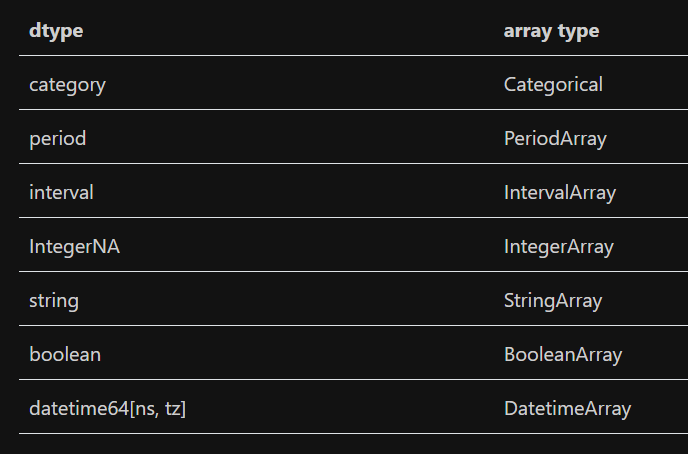

In [15]:
pd.Series([1, 2, 3]).array

<PandasArray>
[1, 2, 3]
Length: 3, dtype: int64

In [16]:
ser = pd.Series(pd.Categorical(['a', 'b', 'a']))
ser.array

['a', 'b', 'a']
Categories (2, object): ['a', 'b']

### Series.values (but it is recommended to use array or to_numpy) 

In [19]:
a=[12,3242,34434]
pd.Series(a).array

<PandasArray>
[12, 3242, 34434]
Length: 3, dtype: int64

In [20]:
pd.Series(a).values

array([   12,  3242, 34434], dtype=int64)

In [21]:
pd.Series(list('aabc')).values

array(['a', 'a', 'b', 'c'], dtype=object)

### Series.dtype

Return the dtype object of the underlying data.

In [23]:
s=pd.Series([12,213,4334])
s.dtype

dtype('int64')

In [24]:
type(s)

pandas.core.series.Series

In [25]:
s.dtypes

dtype('int64')

### Series.shape
Return a tuple of the shape of the underlying data.

In [26]:
s

0      12
1     213
2    4334
dtype: int64

In [27]:
s.shape

(3,)

In [45]:
import numpy as np
alp=np.random.randint(0,9,9).reshape(1,9)
alp[0]

array([3, 4, 6, 2, 5, 1, 2, 7, 3])

In [47]:
alp[0].shape

(9,)

In [49]:
new_ser=pd.Series(alp[0])
new_ser

0    3
1    4
2    6
3    2
4    5
5    1
6    2
7    7
8    3
dtype: int32

In [50]:
new_ser.shape

(9,)

### Series.nbytes
Return the number of bytes in the underlying data.

In [53]:
s=pd.Series(['Antdxfcgv','Bear','Cow'])
s

0    Antdxfcgv
1         Bear
2          Cow
dtype: object

In [54]:
s.nbytes

24

### Series.ndim
Returns the number of dimensins of the underlying data

In [55]:
s.ndim

1

In [58]:
new_ser.ndim

1

In [59]:
alp.ndim

2

### Series.size 
Returns the number of elements in the underlying data.

In [60]:
s = pd.Series(['Ant', 'Bear', 'Cow'])
s

0     Ant
1    Bear
2     Cow
dtype: object

In [61]:
s.size

3

### Transponse function
Returns transpose of the matrix.

In [68]:
newl=alp.reshape(3,3)
newl

array([[3, 4, 6],
       [2, 5, 1],
       [2, 7, 3]])

In [69]:
newl.T

array([[3, 2, 2],
       [4, 5, 7],
       [6, 1, 3]])

### Series.hasnans
Return True if there are any NaN's.
Enables various performances speedups

In [73]:
my_df=pd.read_csv('Housing_Data_Train.csv')
my_df

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,149,20,RL,63.0,7500,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2008,WD,Normal,141000
1,1,460,50,RL,NaN,7015,Pave,NaN,IR1,Bnk,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,110000
2,2,1336,20,RL,80.0,9650,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,167900
3,3,805,20,RL,75.0,9000,Pave,NaN,Reg,Lvl,...,0,NaN,GdWo,NaN,0,6,2006,WD,Family,118000
4,4,1396,60,RL,88.0,12665,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,281213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,912,20,RL,NaN,9286,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,10,2009,WD,Normal,143500
996,996,916,160,RM,21.0,2001,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,75000
997,997,399,30,RM,60.0,8967,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,11,2007,WD,Abnorml,67000
998,998,381,50,RL,50.0,5000,Pave,Pave,Reg,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,127000


In [75]:
my_df["Id"].dtype

dtype('int64')

In [76]:
type(my_df['Id'])

pandas.core.series.Series

In [77]:
my_df['Id'].hasnans

False

In [78]:
my_df['Alley'].hasnans

True

In [79]:
# Get the columns that have NaNs in it
for i in my_df.columns:
    if my_df[i].hasnans:
        print(i)

LotFrontage
Alley
MasVnrType
MasVnrArea
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Electrical
FireplaceQu
GarageType
GarageYrBlt
GarageFinish
GarageQual
GarageCond
PoolQC
Fence
MiscFeature


#### List comprehension 

In [82]:
[i for i in my_df.columns if my_df[i].hasnans]

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

### Series.empty
Indicator whether Series/DataFrame is empty
If Series/DataFrame contains only NaNs, it is still not considered empty.

Returns true if the series  is empty else returns false

In [85]:
my_df.head(1)

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,149,20,RL,63.0,7500,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2008,WD,Normal,141000


In [87]:
my_df.empty

False

In [89]:
df_empty = pd.DataFrame({'A' : []})
df_empty.empty

True

#### If we only have NaNs in our DataFrame, it is not considered empty! We will need to drop the NaNs to make the DataFrame empty:

In [90]:
df = pd.DataFrame({'A' : [np.nan]})
df.empty

False

In [93]:
df.dropna(inplace=True)
df.empty

True

### series.name
Returns the names of the series.
Name of the Series becomes its index or column name if it is used to form a DataFrame.

In [96]:
my_df['Id'].name='SFDDFA'

In [101]:
my_df['Id'].name  # Even though the name doesn't get changed in the df 
# but the name for the series got changed.

'SFDDFA'

### Series.flags
Get the properties associated with this pandas object.

“Flags” differ from “metadata”. Flags reflect properties of the pandas object (the Series or DataFrame). Metadata refer to properties of the dataset, and should be stored in DataFrame.attrs.

In [103]:
df = pd.DataFrame({"A": [1, 2]})
df.flags

<Flags(allows_duplicate_labels=True)>

### Series.set_flags
Return a new object with updated flags.

## Conversion

### Series.astype 
Cast a pandas object to a specified dtype <br>
Should be careful of copy parameter, (Return a copy when copy=True (be careful setting copy=False as changes to values then may propogate to other pandas objects.

In [124]:
d = {'col1': [1, 2], 'col2': [3, 4]}
df = pd.DataFrame(data=d)
df.dtypes

col1    int64
col2    int64
dtype: object

In [125]:
df.astype('int32').dtypes

col1    int32
col2    int32
dtype: object

In [126]:
df.dtypes

col1    int64
col2    int64
dtype: object

#### To make the change in the original dataframe we have to use the df[col].astype(int/float/str) etc

In [131]:
df.astype({'col1':'int32'},copy=False, inplace=True).dtypes

TypeError: NDFrame.astype() got an unexpected keyword argument 'inplace'

In [134]:
df['col1']=df['col1'].astype(float)

In [135]:
df.dtypes

col1    float64
col2      int64
dtype: object

In [129]:
df

,col1,col2
0,1,3
1,2,4


In [130]:
ser = pd.Series([1, 2], dtype='int32')
ser

0    1
1    2
dtype: int32

In [118]:
ser.astype('category')


0    1
1    2
dtype: category
Categories (2, int64): [1, 2]

In [119]:
ser.dtypes

dtype('int32')

### Convert_dtypes
Convert columns to the best possible dtypes using dtypes supporting pd.NA

By using the options convert_string, convert_integer, convert_boolean and convert_floating, it is possible to turn off individual conversions to StringDtype, the integer extension types, BooleanDtype or floating extension types, respectively.

In [1]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
>>> df = pd.DataFrame(
...     {
...         "a": pd.Series([1, 2, 3], dtype=np.dtype("int32")),
...         "b": pd.Series(["x", "y", "z"], dtype=np.dtype("O")),
...         "c": pd.Series([True, False, np.nan], dtype=np.dtype("O")),
...         "d": pd.Series(["h", "i", np.nan], dtype=np.dtype("O")),
...         "e": pd.Series([10, np.nan, 20], dtype=np.dtype("float")),
...         "f": pd.Series([np.nan, 100.5, 200], dtype=np.dtype("float")),
...     }
... )

In [5]:
df

,a,b,c,d,e,f
0,1,x,True,h,10.0,NaN
1,2,y,False,i,NaN,100.5
2,3,z,NaN,NaN,20.0,200.0


In [8]:
df.dtypes

a      int32
b     object
c     object
d     object
e    float64
f    float64
dtype: object

In [9]:
dfn=df.convert_dtypes()
dfn

,a,b,c,d,e,f
0,1,x,True,h,10,<NA>
1,2,y,False,i,<NA>,100.5
2,3,z,<NA>,<NA>,20,200.0


In [10]:
dfn.dtypes

a      Int32
b     string
c    boolean
d     string
e      Int64
f    Float64
dtype: object

In [11]:
df.dtypes

a      int32
b     object
c     object
d     object
e    float64
f    float64
dtype: object

In [14]:
dfn=df.convert_dtypes(convert_string=False)
dfn.dtypes  # the difference we could see here
# That the object data type is left as it is, not converted into the string datatype.

a      Int32
b     object
c    boolean
d     object
e      Int64
f    Float64
dtype: object

### copy 
Make a copy of this objects indices and data.

copy(deep=True) 
<br> If this parameter is set to False, then without copying the calling objects data or index. Any changes to the data of the original will be reflected in the shallow copy.

<br> By default it is set to true, so changes made inside the copy wont be reflected in original dataframe/series.

In [15]:
s = pd.Series([1, 2], index=["a", "b"])
s

a    1
b    2
dtype: int64

In [16]:
s.copy()

a    1
b    2
dtype: int64

In [17]:
s_copy=s.copy()
s_copy

a    1
b    2
dtype: int64

In [18]:
s = pd.Series([1, 2], index=["a", "b"])
deep = s.copy()
shallow = s.copy(deep=False)

In [21]:
s.values is shallow.values and s.index is shallow.index

True

In [22]:
s.values is deep.values or s.index is deep.index

False

In [23]:
s.iloc[0] = 3
shallow.iloc[1] = 4
s

a    3
b    4
dtype: int64

In [24]:
shallow

a    3
b    4
dtype: int64

In [25]:
deep

a    1
b    2
dtype: int64

#### Updating a nested data object will be reflected in the deep copy.

In [26]:
s = pd.Series([[1, 2], [3, 4]])
deep = s.copy()
s[0][0] = 10
s

0    [10, 2]
1     [3, 4]
dtype: object

In [27]:
deep

0    [10, 2]
1     [3, 4]
dtype: object

### to_numpy  
A numpy ndarray representing the values in this Series or Index.

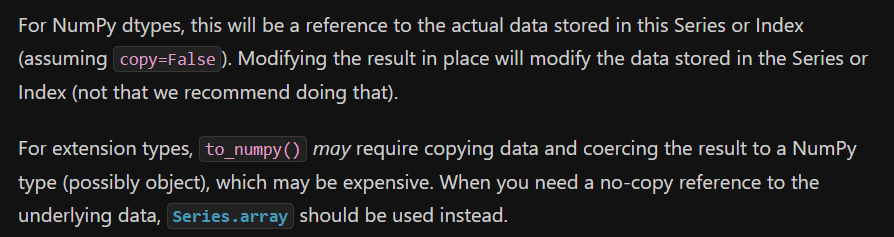

In [28]:
ser = pd.Series(pd.Categorical(['a', 'b', 'a']))
ser.to_numpy()

array(['a', 'b', 'a'], dtype=object)

### to_list
Return a list of the values.
<br>
These are each a scalar type, which is a python scalar or a pandas scalar.

In [29]:
s=pd.Series([2,3435,667])
s.to_list()

[2, 3435, 667]

In [30]:
s.to_numpy()

array([   2, 3435,  667], dtype=int64)

In [31]:
idx = pd.Index([1, 2, 3])
idx

Int64Index([1, 2, 3], dtype='int64')

In [32]:
idx.to_list()

[1, 2, 3]

## Indexing, Iteration

### get
Get item from object for given Key (ex: DataFrame Column).

In [33]:
import pandas as pd

data = {'A': 1, 'B': 2, 'C': 3}
s = pd.Series(data)

# Accessing an existing label
value = s.get('B')
print(value)  # Output: 2

# Accessing a non-existent label with a default value
value = s.get('D', -1)
print(value)  # Output: -1

# Accessing a non-existent label without a default value (returns None)
value = s.get('E')
print(value)  # Output: None

2
-1
None


In [34]:
grades_data = {'Alice': 'A', 'Bob': 'C', 'Charlie': 'F'}
grades_series = pd.Series(grades_data)
grades_series

Alice      A
Bob        C
Charlie    F
dtype: object

In [37]:
student_name = 'Dave'
result = grades_series.get(student_name)

if result is None:
    if student_name.startswith('A'):
        default_grade = 'A'
    else:
        default_grade = 'D'
else:
    default_grade = result

print(f"Student {student_name} received a default grade: {default_grade}")


Student Dave received a default grade: D


In [35]:
import pandas as pd

data = {
    'person': {
        'name': 'John',
        'address': {
            'city': 'New York',
            'state': 'NY'
        }
    }
}
series = pd.Series(data)

city = series.get('person', {}).get('address', {}).get('city', 'Unknown')
print(f"City: {city}")


City: New York


### at
Access a single value for a row/column label pair.<br>
Similar to loc, in that both provide label-based lookups. Use 'at' if you only need to get or set a single value in a DataFrame or Series.

In [38]:
df = pd.DataFrame([[0, 2, 3], [0, 4, 1], [10, 20, 30]],
                  index=[4, 5, 6], columns=['A', 'B', 'C'])
df

,A,B,C
4,0,2,3
5,0,4,1
6,10,20,30


In [39]:
df.at[4, 'B']

2

In [44]:
df.at[5,'B'] # takes 2 inputs row and col

4

In [45]:
df.at[5,'C']=12
df

,A,B,C
4,0,2,3
5,0,4,12
6,10,20,30


In [47]:
df.loc[5].at['B']

4

### iat
Access a single value for a row/column pair by integer position.<bR>
Similar to iloc, in that both provide integer-based lookups.Use iat if you only need to get or set a single value in a DataFrame or Series.

In [48]:
df = pd.DataFrame([[0, 2, 3], [0, 4, 1], [10, 20, 30]],
                  columns=['A', 'B', 'C'])
df

,A,B,C
0,0,2,3
1,0,4,1
2,10,20,30


In [51]:
df.iat[2,2]

30

### loc 
Access a group of rows and columns by <b>labels</b> or a boolean array.

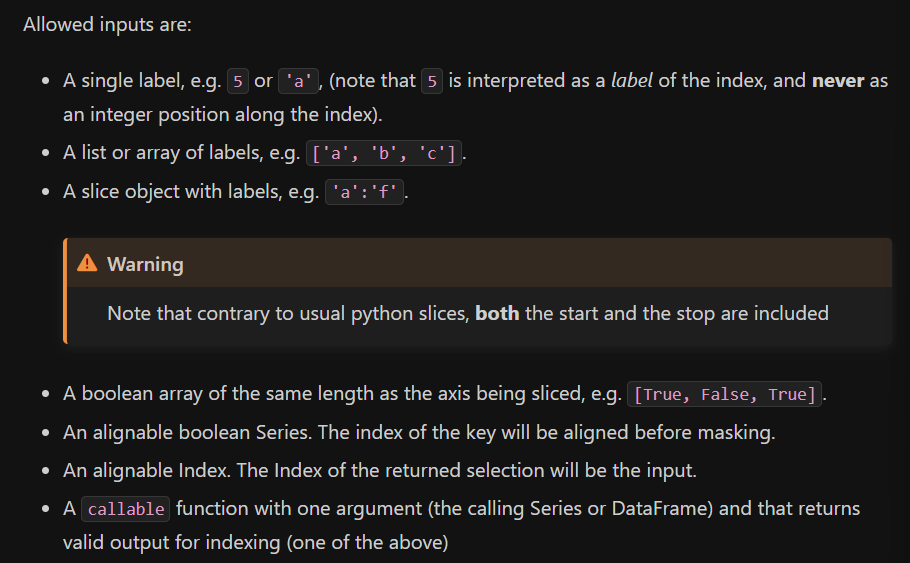

In [2]:
df=pd.DataFrame([[1,2],[4,5],[6,7]],columns=['max_speed','shield'],index=['cobra',
                                                                         'viper','sidewinder'])
df

,max_speed,shield
cobra,1,2
viper,4,5
sidewinder,6,7


In [3]:
df.loc[['viper','sidewinder']]

,max_speed,shield
viper,4,5
sidewinder,6,7


In [4]:
df.loc['cobra', 'shield']
# The label is from both column and row.

2

In [5]:
df.loc[:,:]

,max_speed,shield
cobra,1,2
viper,4,5
sidewinder,6,7


In [6]:
df.loc['viper':,'shield':]

,shield
viper,5
sidewinder,7


In [7]:
df.loc[[False, False, True]]
# only returns the true (3rd entry).

,max_speed,shield
sidewinder,6,7


#### Condition that returns a boolean Series.

In [8]:
df.loc[df['shield'] > 6]

,max_speed,shield
sidewinder,6,7


In [9]:
df.loc[df['shield'] > 6, ['max_speed']]

,max_speed
sidewinder,6


#### If you find yourself using 3 or more conditionals in .loc[], consider using advanced indexing.

In [10]:
df.loc[lambda df: df['shield'] == 7]

,max_speed,shield
sidewinder,6,7


#### Setting values using the loc function.

In [11]:
df.loc[['viper', 'sidewinder'], ['shield']] = 50
df

,max_speed,shield
cobra,1,2
viper,4,50
sidewinder,6,50


In [12]:
df.loc['cobra'] = 10
df

,max_speed,shield
cobra,10,10
viper,4,50
sidewinder,6,50


In [15]:
df.loc[:,'max_speed']=30

In [16]:
df

,max_speed,shield
cobra,30,10
viper,30,50
sidewinder,30,50


#### Set value for rows matching callable condition

In [18]:
df.loc[df['shield']>35]=0
df

,max_speed,shield
cobra,30,10
viper,0,0
sidewinder,0,0


In [20]:
df.loc[df['max_speed']==0]=23
df

,max_speed,shield
cobra,30,10
viper,23,23
sidewinder,23,23


#### This is what we were searching in the past.

In [21]:
df['shield'].loc[df['max_speed']==23]=0
df

,max_speed,shield
cobra,30,10
viper,23,0
sidewinder,23,0


In [22]:
df.loc['viper','shield']+=5
df

,max_speed,shield
cobra,30,10
viper,23,5
sidewinder,23,0


#### Setting using a Series or a DataFrame sets the values matching the index labels, not the index positions.

In [23]:
shuffled_df = df.loc[["viper", "cobra", "sidewinder"]]
df.loc[:] += shuffled_df
df

,max_speed,shield
cobra,60,20
viper,46,10
sidewinder,46,0


### iloc ->
Purely integer - location based indexing for selection by position.<br>
But may also be used with a boolean array.

In [24]:
mydict = [{'a': 1, 'b': 2, 'c': 3, 'd': 4},
          {'a': 100, 'b': 200, 'c': 300, 'd': 400},
          {'a': 1000, 'b': 2000, 'c': 3000, 'd': 4000 }]

In [26]:
df=pd.DataFrame(mydict)
df

,a,b,c,d
0,1,2,3,4
1,100,200,300,400
2,1000,2000,3000,4000


In [29]:
df.iloc[0:,0]

0       1
1     100
2    1000
Name: a, dtype: int64

In [32]:
df.iloc[[0,0]]

,a,b,c,d
0,1,2,3,4
0,1,2,3,4


In [36]:
df.iloc[[1,2]] 
#df.iloc[[1,2],:]  #both were the same so we can just thing of this way


,a,b,c,d
1,100,200,300,400
2,1000,2000,3000,4000


In [34]:
df.iloc[1,2]

300

In [37]:
df.iloc[[0,2],[1,3]]
# (0,1) ,(0,3) and (2,1) , (2,3)

,b,d
0,2,4
2,2000,4000


In [38]:
df.iloc[1:3, 0:3]

,a,b,c
1,100,200,300
2,1000,2000,3000


#### With a boolean array whose length matches the columns

In [39]:
df.iloc[:, [True, False, True, False]]

,a,c
0,1,3
1,100,300
2,1000,3000


### items, keys, item (like in dictionary)
items -> Lazily iterate over (index, value) tuples.<br>
keys -> return alias for index<br>
item -> return the first element of the underlying data as a python scalar.

In [40]:
s = pd.Series(['A', 'B', 'C'])
for index, value in s.items():
    print(f"Index : {index}, Value : {value}")

Index : 0, Value : A
Index : 1, Value : B
Index : 2, Value : C


In [41]:
s.items()

In [42]:
s = pd.Series([1, 2, 3], index=[0, 1, 2])
s.keys()

Int64Index([0, 1, 2], dtype='int64')

In [43]:
s.item()

ValueError: can only convert an array of size 1 to a Python scalar

### pop 
Return item and drops from series. Raise keyerror if not found.

In [44]:
ser = pd.Series([1,2,3])

In [45]:
ser.pop(0)

1

In [46]:
ser

1    2
2    3
dtype: int64

## Binary Operator Functions

### add 
-> return addition of series and other, element wise<br>
-> Equivalent to series + other, but with support to substitute a <b>fill_value for missing data in either one of the inputs.

In [2]:
a=pd.Series([1,232424,34])
b=pd.Series([10,20,30])
a.add(b)

0        11
1    232444
2        64
dtype: int64

In [3]:
import numpy as np
a = pd.Series([1,1,1,np.nan], index=['a','b','c','d'])
b=pd.Series([1,np.nan,1, np.nan], index=['a','b','d','e'])
a.add(b,fill_value=0)

a    2.0
b    1.0
c    1.0
d    1.0
e    NaN
dtype: float64

In [5]:
b.add(a,fill_value=0)

a    2.0
b    1.0
c    1.0
d    1.0
e    NaN
dtype: float64

In [6]:
b.add(a)

a    2.0
b    NaN
c    NaN
d    NaN
e    NaN
dtype: float64

### Same operation with the other things as well
Subtract(Sub), divide/(div), multiply(mul) etC

In [16]:
a1=a.subtract(b,fill_value=0)
a1

a    0.0
b    1.0
c    1.0
d   -1.0
e    NaN
dtype: float64

In [17]:
a2=a.sub(b,fill_value=0)
a2

a    0.0
b    1.0
c    1.0
d   -1.0
e    NaN
dtype: float64

In [19]:
print(a1==a2)

a     True
b     True
c     True
d     True
e    False
dtype: bool


In [22]:
a1 is a2

False

In [23]:
a1.divide(b,fill_value=0)

a    0.0
b    inf
c    inf
d   -1.0
e    NaN
dtype: float64

In [27]:
a.div(b,fill_value=0)

a    1.0
b    inf
c    inf
d    0.0
e    NaN
dtype: float64

In [28]:
a.mul(b,fill_value=0)

a    1.0
b    0.0
c    0.0
d    0.0
e    NaN
dtype: float64

In [29]:
a.multiply(b,fill_value=0)

a    1.0
b    0.0
c    0.0
d    0.0
e    NaN
dtype: float64

### floordiv 
-> Fits value in the nan position if there is any such (from the input Series).

In [34]:
a=pd.Series([121,23,323,847,7])
b=pd.Series([11,46,6436, 1000,13])
a.floordiv(b)

0    11
1     0
2     0
3     0
4     0
dtype: int64

In [35]:
b.floordiv(a)

0     0
1     2
2    19
3     1
4     1
dtype: int64

### mod 
-> Return modulo of series and other, element-wise (binary operator mod).

In [36]:
a.mod(b)

0      0
1     23
2    323
3    847
4      7
dtype: int64

In [37]:
b.mod(a)

0     11
1      0
2    299
3    153
4      6
dtype: int64

In [38]:
alp = pd.Series([1, 1, 1, np.nan], index=['a', 'b', 'c', 'd'])
alp

a    1.0
b    1.0
c    1.0
d    NaN
dtype: float64

In [39]:
blp = pd.Series([1, np.nan, 1, np.nan], index=['a', 'b', 'd', 'e'])
blp

a    1.0
b    NaN
d    1.0
e    NaN
dtype: float64

In [42]:
alp.mod(blp, fill_value=9999)

a    0.0
b    1.0
c    1.0
d    0.0
e    NaN
dtype: float64

In [49]:
alp.index=[0,1,2,3]
alp

0    1.0
1    1.0
2    1.0
3    NaN
dtype: float64

In [52]:
blp.index=[0,1,2,3]

In [55]:
alp.add(blp,fill_value=3232)

0       2.0
1    3233.0
2       2.0
3       NaN
dtype: float64

In [56]:
alp.mod(blp,fill_value=328129)

0    0.0
1    1.0
2    0.0
3    NaN
dtype: float64

### pow
-> Return exponential power of series and other, element-wise

In [60]:
n1=pd.Series([1,2,4,5])
n2=pd.Series([3,4,5,6])

In [61]:
n1.pow(n2)

0        1
1       16
2     1024
3    15625
dtype: int64

In [62]:
n2.pow(n1,fill_value=2121)
# the fill value only works fine if there is any nan is present in the dataset.

0       3
1      16
2     625
3    7776
dtype: int64

### Combine
-> Combine the Series with a series or scalar according to func.

In [63]:
s1 = pd.Series({'falcon': 330.0, 'eagle': 160.0})
s1

falcon    330.0
eagle     160.0
dtype: float64

In [64]:
s2 = pd.Series({'falcon': 345.0, 'eagle': 200.0, 'duck': 30.0})
s2

falcon    345.0
eagle     200.0
duck       30.0
dtype: float64

In [67]:
s1.combine(s2, min)

duck        NaN
eagle     160.0
falcon    330.0
dtype: float64

#### Look for the difference between these 2 operations.

In [68]:
s1.combine(s2, min,fill_value=0)

duck        0.0
eagle     160.0
falcon    330.0
dtype: float64

In [69]:
s1.combine(s2, max,fill_value=0)

duck       30.0
eagle     200.0
falcon    345.0
dtype: float64

### combine_first
Update null elements with value in the same location in 'other'.<br>
Combine 2 series objects by filling null values in 1 series with non-null values from the other series. Result index will be the union of 2 indexes.

### Notice the difference between the combine vs combine_first

In [70]:
s1 = pd.Series([1, np.nan])
s2 = pd.Series([3, 4, 5])
s1.combine_first(s2)

0    1.0
1    4.0
2    5.0
dtype: float64

In [74]:
s1.combine(s2,max,fill_value=0)

0    3.0
1    NaN
2    5.0
dtype: float64

In [77]:
s1 = pd.Series({'falcon': np.nan, 'eagle': 160.0})
s2 = pd.Series({'eagle': 200.0, 'duck': 30.0})
s1.combine_first(s2)
#notice the eagle is 160 (which is the first series used to perform the operations)

duck       30.0
eagle     160.0
falcon      NaN
dtype: float64

In [78]:
s2.combine_first(s1)
# here it is 200, as we are performing on the 2nd series, it will be our first one.

duck       30.0
eagle     200.0
falcon      NaN
dtype: float64

### round
-> Round each value in a Series to the given number of decimals.<br>
-> If decimals is negative, it specifies the number of positions to the left of the decimal point.

In [94]:
k=pd.Series({'Alpha':12.4343534,'Beta':874.32422,'Gamma':329.21552, 'Delta':98302.918121, 'Sigma':99.555,'Phi':45.49555})
k

Alpha       12.434353
Beta       874.324220
Gamma      329.215520
Delta    98302.918121
Sigma       99.555000
Phi         45.495550
dtype: float64

In [95]:
k.round()

Alpha       12.0
Beta       874.0
Gamma      329.0
Delta    98303.0
Sigma      100.0
Phi         45.0
dtype: float64

In [98]:
k.round(3)

Alpha       12.434
Beta       874.324
Gamma      329.216
Delta    98302.918
Sigma       99.555
Phi         45.496
dtype: float64

In [99]:
k

Alpha       12.434353
Beta       874.324220
Gamma      329.215520
Delta    98302.918121
Sigma       99.555000
Phi         45.495550
dtype: float64

#### If decimals < 0, it specifies the number of positions to the left of the decimal point.

In [97]:
k.round(-2)

Alpha        0.0
Beta       900.0
Gamma      300.0
Delta    98300.0
Sigma      100.0
Phi          0.0
dtype: float64

In [100]:
k.round(-1)

Alpha       10.0
Beta       870.0
Gamma      330.0
Delta    98300.0
Sigma      100.0
Phi         50.0
dtype: float64

### lt, gt, le, ge, ne, eq, 
less than, greater than, less than or equal, greater than or equal, not equal, equal <br>
fill value will fills given value at the nan position.

In [102]:
k.lt(10)

Alpha    False
Beta     False
Gamma    False
Delta    False
Sigma    False
Phi      False
dtype: bool

In [103]:
k

Alpha       12.434353
Beta       874.324220
Gamma      329.215520
Delta    98302.918121
Sigma       99.555000
Phi         45.495550
dtype: float64

In [104]:
a = pd.Series([1, 1, 1, np.nan, 1], index=['a', 'b', 'c', 'd', 'e'])
a

a    1.0
b    1.0
c    1.0
d    NaN
e    1.0
dtype: float64

In [105]:
b = pd.Series([0, 1, 2, np.nan, 1], index=['a', 'b', 'c', 'd', 'f'])
b

a    0.0
b    1.0
c    2.0
d    NaN
f    1.0
dtype: float64

In [113]:
a.add(b,fill_value=0)
# fill_value doesn't gonna fill in both series it either fills one of them
# if you got nan value in 2 series, it will place fill_value at only in the one 
# on which we are performing the operations.

a    1.0
b    2.0
c    3.0
d    NaN
e    1.0
f    1.0
dtype: float64

In [114]:
a.le(b,fill_value=120)

a    False
b     True
c     True
d    False
e     True
f    False
dtype: bool

In [115]:
a.lt(b,fill_value=0)

a    False
b    False
c     True
d    False
e    False
f     True
dtype: bool

### product
-> Return the product of the values over the requested axis.

In [118]:
n1

0    1
1    2
2    4
3    5
dtype: int64

In [119]:
n2

0    3
1    4
2    5
3    6
dtype: int64

In [123]:
n1.prod()

40

In [127]:
a=np.random.randint(0,10,9).reshape(3,3)
a

array([[6, 0, 8],
       [6, 8, 0],
       [8, 7, 5]])

In [128]:
a.prod(1)

array([  0,   0, 280])

In [129]:
a.prod(0)

array([288,   0,   0])

In [131]:
a.prod()

0

In [132]:
gna=np.random.randint(1,10,9).reshape(3,3)
gna

array([[5, 8, 4],
       [3, 4, 4],
       [5, 9, 7]])

In [133]:
gna.prod(1), gna.prod(0)

(array([160,  48, 315]), array([ 75, 288, 112]))

In [135]:
gna.prod() # this without any axis will return the whole product of the matrix.

2419200

In [136]:
n1

0    1
1    2
2    4
3    5
dtype: int64

In [137]:
n2

0    3
1    4
2    5
3    6
dtype: int64

In [139]:
n1.dot(n2)
# 3 + 8 + 20 + 30 
# 11 + 50
# 61

61

## Function application, GroupBy & Window

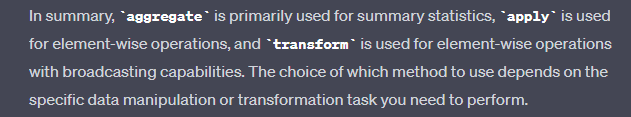

### apply
-> Invoke function on values of Series. <br>
-> Can be ufunc or a python function that only works on single values.

In [140]:
s=pd.Series([20,21,2121],index=['Long','Medium', 'Short'])
s

Long        20
Medium      21
Short     2121
dtype: int64

In [144]:
def square(x):
    return x**2
s.apply(square)

Long          400
Medium        441
Short     4498641
dtype: int64

In [145]:
s.apply(lambda x: x ** 2)

Long          400
Medium        441
Short     4498641
dtype: int64

#### args keyword
-> Define a custom function that needs additionl positional args and pass these additional args using the 'args' keyword.

In [146]:
def subtract_custom_value(x, custom_value):
    return x - custom_value

In [148]:
s

Long        20
Medium      21
Short     2121
dtype: int64

In [147]:
s.apply(subtract_custom_value, args=(10,))

Long        10
Medium      11
Short     2111
dtype: int64

In [154]:
def add_custom_values(x, **kwargs):
     for month in kwargs:
        x += kwargs[month]
     return x

In [155]:
s.apply(add_custom_values, june=30, july=20, august=25)

Long        95
Medium      96
Short     2196
dtype: int64

#### Use a function from the numpy library.

In [156]:
s.apply(np.log)

Long      2.995732
Medium    3.044522
Short     7.659643
dtype: float64

### agg / aggregate
-> Aggregate using one or more operations over the specified axis

In [157]:
gna

array([[5, 8, 4],
       [3, 4, 4],
       [5, 9, 7]])

In [158]:
np.mean(gna)

5.444444444444445

In [159]:
np.mean(gna, axis=0)

array([4.33333333, 7.        , 5.        ])

In [161]:
s=pd.Series([1,2,34,565])
s

0      1
1      2
2     34
3    565
dtype: int64

In [162]:
s.agg(min)

1

In [163]:
s.agg(max)

565

In [165]:
import pandas as pd

data = {'values': [10, 20, 30, 40, 50]}
series = pd.Series(data['values'])

result = series.agg(['sum', 'mean', 'min', 'max'])
print(result)


sum     150.0
mean     30.0
min      10.0
max      50.0
dtype: float64


In [166]:
import pandas as pd

data = {'values': [10, 20, 30, 40, 50]}
series = pd.Series(data['values'])

def custom_range(series):
    return series.max() - series.min()

result = series.agg(custom_range)
print(result)


40


In [167]:
import pandas as pd

data = {'values': [10, 20, 30, 40, 50]}
series = pd.Series(data['values'])

aggregation_dict = {
    'Total': 'sum',
    'Average': 'mean',
    'Range': custom_range
}

result = series.agg(aggregation_dict)
print(result)


Total      150.0
Average     30.0
Range       40.0
dtype: float64


### transform
-> Call func on self producing a Series with the same axis shape as self.

In [168]:
df = pd.DataFrame({'A': range(3), 'B': range(1, 4)})
df

,A,B
0,0,1
1,1,2
2,2,3


In [169]:
df.transform(lambda x:x+1)

,A,B
0,1,2
1,2,3
2,3,4


#### Even though the resulting Series must have the same length as the input series, it is possible to provide several input functions.

In [170]:
s = pd.Series(range(3))
s.transform([np.sqrt,np.exp])

,sqrt,exp
0,0.000000,1.000000
1,1.000000,2.718282
2,1.414214,7.389056


#### We can call transform on a GroupBy object.

In [171]:
df = pd.DataFrame({
    "Date": [
        "2015-05-08", "2015-05-07", "2015-05-06", "2015-05-05",
        "2015-05-08", "2015-05-07", "2015-05-06", "2015-05-05"],
    "Data": [5, 8, 6, 1, 50, 100, 60, 120],
})
df

,Date,Data
0,2015-05-08,5
1,2015-05-07,8
2,2015-05-06,6
3,2015-05-05,1
4,2015-05-08,50
5,2015-05-07,100
6,2015-05-06,60
7,2015-05-05,120


In [172]:
df.groupby('Date')['Data'].transform('sum')

0     55
1    108
2     66
3    121
4     55
5    108
6     66
7    121
Name: Data, dtype: int64

In [173]:
df = pd.DataFrame({
    "c": [1, 1, 1, 2, 2, 2, 2],
    "type": ["m", "n", "o", "m", "m", "n", "n"]
})
df

,c,type
0,1,m
1,1,n
2,1,o
3,2,m
4,2,m
5,2,n
6,2,n


In [180]:
df['size'] = df.groupby('c')['type'].transform(len)
df

,c,type,size
0,1,m,3
1,1,n,3
2,1,o,3
3,2,m,4
4,2,m,4
5,2,n,4
6,2,n,4


### map
-> Map values of Series according to an input mapping or function.<br>
-> Used for substituting each value in a series with another value, that may be derived from a function, a dict or a Series

In [181]:
s = pd.Series(['cat', 'dog', np.nan, 'rabbit'])
s

0       cat
1       dog
2       NaN
3    rabbit
dtype: object

In [182]:
s.map({'cat':'kitten', 'dog':'puppy'})

0    kitten
1     puppy
2       NaN
3       NaN
dtype: object

#### It also accepts a function

In [183]:
s.map('I am a {}'.format)

0       I am a cat
1       I am a dog
2       I am a nan
3    I am a rabbit
dtype: object

#### To avoid applying the function to missing values  na_action='ignore' can be used

In [187]:
s.map('I am a {}'.format, na_action='ignore')

0       I am a cat
1       I am a dog
2              NaN
3    I am a rabbit
dtype: object

### groupby
-> Group Series using a mapper or by a Series of Columns.<br>
-> A groupby operation involves some combination of splitting the object, applying a function, and combining the results. This can be used to group large amounts of data and compute operations on these groups.

In [2]:
ser = pd.Series([390., 350., 30., 20.],
                index=['Falcon', 'Falcon', 'Parrot', 'Parrot'],
                name="Max Speed")
ser

Falcon    390.0
Falcon    350.0
Parrot     30.0
Parrot     20.0
Name: Max Speed, dtype: float64

In [7]:
ser.groupby(ser>100).mean()
# We are grouping with the condition that, if value is  >100 (make it a single class)
# If the value < 100 make it another. 
# So (30+20)/2 = 25 and (390+350)/2 = 370. 

Max Speed
False     25.0
True     370.0
Name: Max Speed, dtype: float64

In [8]:
ser.groupby(['a','a','b','b']).mean() 

a    370.0
b     25.0
Name: Max Speed, dtype: float64

In [9]:
ser.groupby(['a','b','a','b']).mean() 

a    210.0
b    185.0
Name: Max Speed, dtype: float64

In [10]:
ser.groupby(level=0).mean()

Falcon    370.0
Parrot     25.0
Name: Max Speed, dtype: float64

In [11]:
ceral = pd.Series([390., 350., 30., 20.,4434.],
                index=['Falcon', 'Falcon', 'Parrot', 'Parrot','Falcon'])
ceral

Falcon     390.0
Falcon     350.0
Parrot      30.0
Parrot      20.0
Falcon    4434.0
dtype: float64

In [13]:
ceral.groupby(level=0).mean()

Falcon    1724.666667
Parrot      25.000000
dtype: float64

## Computations / Descriptive Stats

### Series.abs
-> Return a Series/DataFrame with absolute numeric value of each element.<br>
-> Calculate the absolute value element-wise.

In [14]:
s = pd.Series([-1.10, 2, -3.33, 4])
s.abs()

0    1.10
1    2.00
2    3.33
3    4.00
dtype: float64

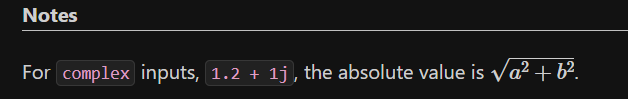

In [15]:
s = pd.Series([1.2 + 1j])
s.abs()

0    1.56205
dtype: float64

### all / any 
-> Return whether all elements are True, potentially over an axis, [all / and] <br>
-> Return whether any element is True, potentially over an axis [any / OR ]

#### series.all(axis, skipna) 
##### axis 
-> 0 / 'index' : reduce the index, return a Series whose index is the original column labels.<br>
-> 1 / 'column' : reduce the columns, return a Serieswhose index is the original index.<br>
-> None : To get the whole matrix value.

##### skipna
Exclude NA/null values. If the entire row/column is NA and skipna is True, then the result will be True, as for an empty row/column. If skipna is False, then NA are treated as True, because these are not equal to zero.

In [16]:
pd.Series([True, True]).all(), pd.Series([True, False]).all()

(True, False)

In [17]:
pd.Series([], dtype="float64").all()

True

In [19]:
import numpy as np
pd.Series([np.nan]).all(skipna=True)

True

In [25]:
pd.Series([np.nan]).all(skipna=False)

True

In [27]:
pd.Series([]).all()  # This is why it let the above thing to be True.

C:\Users\saiga\AppData\Local\Temp\ipykernel_15300\13192821.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pd.Series([]).all()  # This is why it let the above thing to be True.


True

In [28]:
df = pd.DataFrame({'col1': [True, True], 'col2': [True, False]})
df

,col1,col2
0,True,True
1,True,False


In [30]:
df.all(axis=0)   # The index here comes different from the interpretation.
# Even though we are using the index wise comparison it will give the column names

col1     True
col2    False
dtype: bool

In [31]:
df.all(axis=1)  # The index here comes different from the interpretation.

0     True
1    False
dtype: bool

In [33]:
df.all(axis=None)
# When the axis is None, it will get the entire output.

False

### clip, between

### corr
-> corr (other series, method)<br>
method= Pearson, Kindall, spearman etc.

In [34]:
s1=pd.Series([12,34545,34],index=[0,1,2])
s2=pd.Series([12,34545,34],index=[2,1,2])

In [35]:
s2

2       12
1    34545
2       34
dtype: int64

In [37]:
s2.index

Int64Index([2, 1, 2], dtype='int64')

In [39]:
s2[2]   #We will get all the values from the series with the index (2).

2    12
2    34
dtype: int64

In [40]:
s1.corr(s2)

0.9999998477053545

In [41]:
s1=pd.Series([12,34545,34],index=[0,1,2])
s2=pd.Series([12,34545,34],index=[2,1,0])
s1.corr(s2)

0.999999390821465

In [42]:
s1 = pd.Series([1, 2, 3], index=[0, 1, 2])
s2 = pd.Series([1, 2, 3], index=[2, 1, 0])
s1.corr(s2)

-1.0

### series.count
-> Return number of non-NA/null observations in the Series.

In [44]:
import numpy as np
s=pd.Series([0,1,np.nan])

In [45]:
s.count()

2

In [49]:
s.isnull().sum()

1

In [50]:
s.count()

2


### series.cov
-> returns covariance between series.


In [51]:
s1 = pd.Series([0.90010907, 0.13484424, 0.62036035])
s2 = pd.Series([0.12528585, 0.26962463, 0.51111198])
s1.cov(s2)

-0.01685762652715874

### series.cummax, series.cummin, series.cumsum, series.cumprod


In [52]:
s = pd.Series([2, np.nan, 5, -1, 0])
s

0    2.0
1    NaN
2    5.0
3   -1.0
4    0.0
dtype: float64

In [53]:
s.cummax()

0    2.0
1    NaN
2    5.0
3    5.0
4    5.0
dtype: float64

In [55]:
s.cumsum(skipna=False)

0    2.0
1    NaN
2    NaN
3    NaN
4    NaN
dtype: float64

In [61]:
df = pd.DataFrame([[2.0, 1.0],
                   [4.0, np.nan],
                   [1.0, 0.0]],
                  columns=list('AB'))
df

,A,B
0,2.0,1.0
1,4.0,NaN
2,1.0,0.0


In [62]:
df.cummax(axis=None)

,A,B
0,2.0,1.0
1,4.0,NaN
2,4.0,1.0


In [64]:
df.cummax(axis='index',skipna=False)

,A,B
0,2.0,1.0
1,4.0,NaN
2,4.0,NaN


In [65]:
df.cummax()

,A,B
0,2.0,1.0
1,4.0,NaN
2,4.0,1.0


In [70]:
df.cumsum(axis=1)

,A,B
0,2.0,3.0
1,4.0,NaN
2,1.0,1.0


### series.describe, series.diff

### series.factorize
-> Encode the object as an enumerated type or categorical variable.<br>
-> This method is useful for obtaining a <b>numeric representation of an array when all that matters is identifying distinct values.

In [71]:
codes, uniques = pd.factorize(np.array(['b', 'b', 'a', 'c', 'b'], dtype="O"))
codes

array([0, 0, 1, 2, 0], dtype=int64)

In [72]:
uniques

array(['b', 'a', 'c'], dtype=object)

In [73]:
codes, uniques = pd.factorize(np.array(['b', 'b', 'a', 'c', 'b'], dtype="O"),
                              sort=True)
codes

array([1, 1, 0, 2, 1], dtype=int64)

In [74]:
uniques

array(['a', 'b', 'c'], dtype=object)

In [75]:
codes, uniques = pd.factorize(np.array(['b', None, 'a', 'c', 'b'], dtype="O"))
codes

array([ 0, -1,  1,  2,  0], dtype=int64)

In [76]:
uniques

array(['b', 'a', 'c'], dtype=object)

In [77]:
codes, uniques = pd.factorize(np.array(['b', None, 'a', 'c', 'b'], dtype="O"), use_na_sentinel=True)
codes

array([ 0, -1,  1,  2,  0], dtype=int64)

In [78]:
uniques

array(['b', 'a', 'c'], dtype=object)

### Thus far we've only factorized lists. When factorizing pandas objects, the type of uniques will differ. For categoricals, a categorical is returned.

In [85]:
cat = pd.Categorical(['a', 'a', 'c'], categories=['a', 'b', 'c'])
codes, uniques = pd.factorize(cat)
codes

array([0, 0, 1], dtype=int64)

In [86]:
uniques

['a', 'c']
Categories (3, object): ['a', 'b', 'c']

In [87]:
cat = pd.Series(['a', 'a', 'c'])
codes, uniques = pd.factorize(cat)
codes

array([0, 0, 1], dtype=int64)

In [88]:
uniques

Index(['a', 'c'], dtype='object')

### series.kurt, max, min, mean, median, mode, var, sum, std, quantile, 


### nlargest
-> Returns the nlargest integers in the Series, if asked to return top 5 then n=5.

### nsmallest(similar to nlargest)

In [90]:
me=pd.Series([123,565768,121,455,6,7787,-1343])
me

0       123
1    565768
2       121
3       455
4         6
5      7787
6     -1343
dtype: int64

In [92]:
me.nlargest(6)

1    565768
5      7787
3       455
0       123
2       121
4         6
dtype: int64

In [93]:
me.nsmallest(1)

6   -1343
dtype: int64

In [5]:
s1=pd.Series([1,9,10])
s1

0     1
1     9
2    10
dtype: int64

### prod
-> Return the product of the values over the requested axis.<br>
For series, it doesn't bother about the axis (as it does contain only 1 axis which is what makes it useless.<br>

In [7]:
s1.prod()

90

In [8]:
pd.Series([np.nan]).prod()

1.0

### Quantile
-> Return value at the given quantile.

In [9]:
s = pd.Series([1, 2, 3, 4])
s.quantile(.5)

2.5

In [10]:
s.quantile([.25, .5, .75])

0.25    1.75
0.50    2.50
0.75    3.25
dtype: float64

### unique, nunique 
-> Gives the unique values in the series (Unique)<br>
-> nunique returns the count of unique values in the series.

In [11]:
s = pd.Series([1, 3, 5, 7, 7])
s.nunique()

4

### value_counts
-> Return a Series containing <b>counts of unique values.<br></b>
-> The resulting object will be in descending order so that the first element is the most frequently - occuring element.

In [14]:
nel=pd.Series([219,219343,494,494,393,9843])
nel

0       219
1    219343
2       494
3       494
4       393
5      9843
dtype: int64

In [15]:
nel.value_counts()

494       2
219       1
219343    1
393       1
9843      1
dtype: int64

#### With normalize set to True, returns the relative frequency by dividing all values by the sum of values.

In [16]:
s = pd.Series([3, 1, 2, 3, 4, np.nan])
s.value_counts(normalize=True)

3.0    0.4
1.0    0.2
2.0    0.2
4.0    0.2
dtype: float64

#### bins
-> Bins can be useful for going from a continuous variable to a categorical variable; instead of counting unique apparitions of values, divide the index in the specified number of half-open bins.

In [18]:
s.value_counts(bins=3)
# And the bin argument never put the np.nan into the ranges.

(0.996, 2.0]    2
(2.0, 3.0]      2
(3.0, 4.0]      1
dtype: int64

#### dropna
-> With dropna set to False we can also see NaN index values.

In [19]:
s.value_counts(dropna=False)

3.0    2
1.0    1
2.0    1
4.0    1
NaN    1
dtype: int64

## Reindexing / Selection / label manipulation

### drop(labels, axis, index, columns, level, inplace)
-> Return series with <b>specified index labels removed.<bR></b>
-> Remove elements of a Series based on specifying the index labels. when using a multi-index, labels on different levels can be removed by specifying the level.

In [20]:
s = pd.Series(data=np.arange(3), index=['A', 'B', 'C'])
s

A    0
B    1
C    2
dtype: int32

In [21]:
s.drop('A')

B    1
C    2
dtype: int32

In [22]:
s

A    0
B    1
C    2
dtype: int32

In [23]:
s.drop(labels=['B', 'C'])

A    0
dtype: int32

### drop_duplicates
-> Return series with duplicate values removed.

In [24]:
s = pd.Series(['llama', 'cow', 'llama', 'beetle', 'llama', 'hippo'],
              name='animal')
s

0     llama
1       cow
2     llama
3    beetle
4     llama
5     hippo
Name: animal, dtype: object

In [28]:
s.drop_duplicates()

0     llama
1       cow
3    beetle
5     hippo
Name: animal, dtype: object

In [29]:
s.drop_duplicates(keep='last')

1       cow
3    beetle
4     llama
5     hippo
Name: animal, dtype: object

### duplicated
Gives True if the value is duplicated else returns False

### equals
-> Test Whether 2 objects contain the same elements.<br>
-> This function allows 2 series or dataframes to be compared against each other to see if they have the same shape and elements. NaNs in the same location are considered equal.

In [30]:
df = pd.DataFrame({1: [10], 2: [20]})
df

,1,2
0,10,20


In [31]:
exactly_equal = pd.DataFrame({1: [10], 2: [20]})
exactly_equal

,1,2
0,10,20


In [32]:
df.equals(exactly_equal)

True

#### Dataframes df and different_column_type have the same element types and values, but have different types for the column labels, which will still return True.

In [33]:
different_column_type = pd.DataFrame({1.0: [10], 2.0: [20]})
different_column_type

,1.0,2.0
0,10,20


In [34]:
df.equals(different_column_type)

True

#### DataFrames df and different_data_type have different types for the same values for their elements, and will return False even though their column labels are the same values and types.

In [35]:
different_data_type = pd.DataFrame({1: [10.0], 2: [20.0]})
different_data_type

,1,2
0,10.0,20.0


In [36]:
df.equals(different_data_type)

False

### Series.idxmax / same with idxmin
-> Return the row label of the maximum value.<br>
-> If multiple values equal the maximum, the first row label with that value is returned.

This method is the Series version of ndarray.argmax. This method returns the label of the maximum, while ndarray.argmax returns the position. 

In [42]:
s = pd.Series(data=[1, None, 4, 3, 4])
s

0    1.0
1    NaN
2    4.0
3    3.0
4    4.0
dtype: float64

In [43]:
s.idxmax(skipna=False)

nan

In [44]:
s = pd.Series(data=[1, None, 4, 3, 4],
              index=['A', 'B', 'C', 'D', 'E'])
s.idxmax()

'C'

### isin 
-> Whether elements in Series are contained in values.

In [45]:
resr_ind=pd.Series([21,434,1213,7932,238748,9484])
resr_ind

0        21
1       434
2      1213
3      7932
4    238748
5      9484
dtype: int64

In [57]:
resr_ind.index=list(range(1,12,2))

In [58]:
resr_ind

1         21
3        434
5       1213
7       7932
9     238748
11      9484
dtype: int64

### rename 
-> alter series index labels or name.<br>
-> If the input is a scalar, changes Series name <bR>
-> If the input is a function, changes the labels

In [59]:
su=pd.Series([1,2,4])
su.rename('my_name')

0    1
1    2
2    4
Name: my_name, dtype: int64

In [61]:
su.rename(lambda x:x**2)

0    1
1    2
4    4
dtype: int64

### rename_axis 

In [62]:
s=pd.Series(['dog','Cat','monkey'])
s

0       dog
1       Cat
2    monkey
dtype: object

In [63]:
s.rename_axis('animal')

animal
0       dog
1       Cat
2    monkey
dtype: object

### series.sample
-> Return a random sample of items from an axis of object

In [2]:
df = pd.DataFrame({'num_legs': [2, 4, 8, 0],
                   'num_wings': [2, 0, 0, 0],
                   'num_specimen_seen': [10, 2, 1, 8]},
                  index=['falcon', 'dog', 'spider', 'fish'])
df

,num_legs,num_wings,num_specimen_seen
falcon,2,2,10
dog,4,0,2
spider,8,0,1
fish,0,0,8


In [3]:
df.sample(2,random_state=4)

,num_legs,num_wings,num_specimen_seen
falcon,2,2,10
dog,4,0,2


In [4]:
df['num_legs'].sample(n=3, random_state=1)

fish      0
spider    8
falcon    2
Name: num_legs, dtype: int64

In [6]:
df.sample(frac=0.5,replace=True)
# Just because of the replace we were able to get the sample 2 times.

,num_legs,num_wings,num_specimen_seen
spider,8,0,1
dog,4,0,2


#### Upsampling the sample

In [9]:
df.sample(frac=2, replace=False)
 # this should throw error, because we are passing like False(for replace)
    # and we want to get 200% of the data which doesn't make sense.

ValueError: Replace has to be set to `True` when upsampling the population `frac` > 1.

In [11]:
df.sample(frac=2, replace=True)

,num_legs,num_wings,num_specimen_seen
spider,8,0,1
spider,8,0,1
fish,0,0,8
spider,8,0,1
falcon,2,2,10
falcon,2,2,10
spider,8,0,1
falcon,2,2,10


### Series.truncate
-> Truncate a Series or DataFrame before and after some index value.

In [12]:
df = pd.DataFrame({'A': ['a', 'b', 'c', 'd', 'e'],
                   'B': ['f', 'g', 'h', 'i', 'j'],
                   'C': ['k', 'l', 'm', 'n', 'o']},
                  index=[1, 2, 3, 4, 5])
df

,A,B,C
1,a,f,k
2,b,g,l
3,c,h,m
4,d,i,n
5,e,j,o


In [13]:
df.truncate(before=2, after=4)

,A,B,C
2,b,g,l
3,c,h,m
4,d,i,n


In [14]:
df.truncate(before="A", after="B", axis="columns")

,A,B
1,a,f
2,b,g
3,c,h
4,d,i
5,e,j


#### For Series, only rows can be truncated.

In [15]:
df.truncate(before="A", after="B", axis="columns")

,A,B
1,a,f
2,b,g
3,c,h
4,d,i
5,e,j


### where
-> Replace values where the <b>condition is False.

In [16]:
s=pd.Series(range(5))
s

0    0
1    1
2    2
3    3
4    4
dtype: int64

In [17]:
s.where(s>1)

0    NaN
1    NaN
2    2.0
3    3.0
4    4.0
dtype: float64

In [19]:
s.where(s>1,'Niasas')

0    Niasas
1    Niasas
2         2
3         3
4         4
dtype: object

In [20]:
s

0    0
1    1
2    2
3    3
4    4
dtype: int64

In [24]:
df = pd.DataFrame(np.arange(10).reshape(-1, 2), columns=['A', 'B'])
df
# -1 is unspecified value, numpy will infer that as 5 and gives us the final result.


,A,B
0,0,1
1,2,3
2,4,5
3,6,7
4,8,9


In [25]:
m=df%3==0
df.where(m,df)

,A,B
0,0,1
1,2,3
2,4,5
3,6,7
4,8,9


In [26]:
df.where(m,-df)

,A,B
0,0,-1
1,-2,3
2,-4,-5
3,6,-7
4,-8,9


In [27]:
df.where(m, -df) == np.where(m, df, -df)

,A,B
0,True,True
1,True,True
2,True,True
3,True,True
4,True,True


### filter
-> Subset the dataframe rows or column according to the specified index labels.

#### The items, like, and regex parameters are enforced to be mutually exclusive.


In [28]:
df = pd.DataFrame(np.array(([1, 2, 3], [4, 5, 6])),
                  index=['mouse', 'rabbit'],
                  columns=['one', 'two', 'three'])
df


,one,two,three
mouse,1,2,3
rabbit,4,5,6


In [29]:
# select columns by name
df.filter(items=['one', 'three'])

,one,three
mouse,1,3
rabbit,4,6


In [30]:
# select columns by regular expression
df.filter(regex='e$', axis=1)

,one,three
mouse,1,3
rabbit,4,6


In [31]:
# select rows containing 'bbi'
df.filter(like='bbi', axis=0)

,one,two,three
rabbit,4,5,6


## Missing data Handling

### bfill, ffill, dropna, isna, isnull,

### fillna 
-> Fill NA/NaN values using the specified method.

In [73]:
df = pd.DataFrame([[np.nan, 2, np.nan, 0],
                   [3, 4, np.nan, 1],
                   [np.nan, np.nan, np.nan, np.nan],
                   [np.nan, 3, np.nan, 4]],
                  columns=list("ABCD"))
df

,A,B,C,D
0,NaN,2.0,NaN,0.0
1,3.0,4.0,NaN,1.0
2,NaN,NaN,NaN,NaN
3,NaN,3.0,NaN,4.0


In [74]:
df.fillna(0)

,A,B,C,D
0,0.0,2.0,0.0,0.0
1,3.0,4.0,0.0,1.0
2,0.0,0.0,0.0,0.0
3,0.0,3.0,0.0,4.0


#### Replace all NaN elements in column 'A', 'B', 'C', 'D' with 0,1,2, and 3 respectively.

In [77]:
val={'A':0,'B':1,'C':2,'D':3}
df.fillna(value=val)

,A,B,C,D
0,0.0,2.0,2.0,0.0
1,3.0,4.0,2.0,1.0
2,0.0,1.0,2.0,3.0
3,0.0,3.0,2.0,4.0


In [81]:
df

,A,B,C,D
0,NaN,2.0,NaN,0.0
1,3.0,4.0,NaN,1.0
2,NaN,NaN,NaN,NaN
3,NaN,3.0,NaN,4.0


In [80]:
df.fillna(df.mean())

,A,B,C,D
0,3.0,2.0,NaN,0.000000
1,3.0,4.0,NaN,1.000000
2,3.0,3.0,NaN,1.666667
3,3.0,3.0,NaN,4.000000


#### Only replace the first NaN element.

In [83]:
df.fillna(value=val)

,A,B,C,D
0,0.0,2.0,2.0,0.0
1,3.0,4.0,2.0,1.0
2,0.0,1.0,2.0,3.0
3,0.0,3.0,2.0,4.0


In [82]:
df.fillna(value=val, limit=1)

,A,B,C,D
0,0.0,2.0,2.0,0.0
1,3.0,4.0,NaN,1.0
2,NaN,1.0,NaN,3.0
3,NaN,3.0,NaN,4.0


#### When filling using a DataFrame, replacement happens along the same column names and same indices

In [84]:
df2 = pd.DataFrame(np.zeros((4, 4)), columns=list("ABCE"))
df.fillna(df2)

,A,B,C,D
0,0.0,2.0,0.0,0.0
1,3.0,4.0,0.0,1.0
2,0.0,0.0,0.0,NaN
3,0.0,3.0,0.0,4.0


### replace(to_replace=None, value=, * , inplace=False, limit, regex=)
-> Replace values given in to_replace with value.<br>
-> Values of the series/dataframe are replaced with other values dynamically. This differs from updating with .loc or .iloc, which require you to specify a location to update with some value.

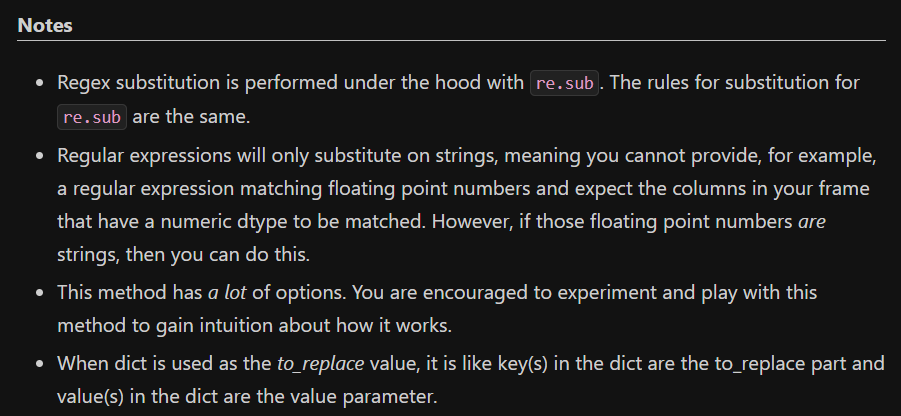

In [85]:
s = pd.Series([1, 2, 3, 4, 5])
s.replace(1, 5)

0    5
1    2
2    3
3    4
4    5
dtype: int64

In [88]:
df = pd.DataFrame({'A': [0, 1, 2, 3, 4],
                   'B': [5, 6, 7, 8, 9],
                   'C': ['a', 'b', 'c', 'd', 'e']})
df.replace(0, 5)

,A,B,C
0,5,5.0,a
1,1,6.0,b
2,2,7.0,c
3,3,8.0,d
4,4,9.0,e
5,5,NaN,f


In [93]:
df = pd.DataFrame({'A': [0, 1, 2, 3, 4,0],
                   'B': [5, 6, 7, 8, 9,3],
                   'C': ['a', 'b', 'c', 'd', 'e','f']})
df.replace(0, 5, limit=1)

,A,B,C
0,5,5,a
1,1,6,b
2,2,7,c
3,3,8,d
4,4,9,e
5,5,3,f


In [94]:
df

,A,B,C
0,0,5,a
1,1,6,b
2,2,7,c
3,3,8,d
4,4,9,e
5,0,3,f


#### This will replace the values where ever it may be located in the dataframe

In [95]:
df.replace([0, 1, 2, 3], 'asasasa')

,A,B,C
0,asasasa,5,a
1,asasasa,6,b
2,asasasa,7,c
3,asasasa,8,d
4,4,9,e
5,asasasa,asasasa,f


In [96]:
df.replace([0, 1, 2, 3], [4, 3, 2, 1])

,A,B,C
0,4,5,a
1,3,6,b
2,2,7,c
3,1,8,d
4,4,9,e
5,4,1,f


In [98]:
s

0    1
1    2
2    3
3    4
4    5
dtype: int64

In [97]:
s.replace([1, 2], method='bfill')

0    3
1    3
2    3
3    4
4    5
dtype: int64

In [32]:
df = pd.DataFrame({'A': [0, 1, 2, 3, 4],
                   'B': [5, 6, 7, 8, 9],
                   'C': ['a', 'b', 'c', 'd', 'e']})
df

,A,B,C
0,0,5,a
1,1,6,b
2,2,7,c
3,3,8,d
4,4,9,e


In [33]:
df.replace({0:10,1:100})

,A,B,C
0,10,5,a
1,100,6,b
2,2,7,c
3,3,8,d
4,4,9,e


In [34]:
df.replace({'A':0,'B':5},100)

,A,B,C
0,100,100,a
1,1,6,b
2,2,7,c
3,3,8,d
4,4,9,e


In [36]:
df.replace({'A': {0: 100, 4: 400}})

,A,B,C
0,100,5,a
1,1,6,b
2,2,7,c
3,3,8,d
4,400,9,e


## Reshaping, Sorting


### argsort
-> Return the <b>integer indices that would sort the Series values</b><br>
-> -1 indicates the nan values.

In [38]:
s = pd.Series([3, 2, 1])
s.argsort()
# same as numpy.ndarray.argsort"

0    2
1    1
2    0
dtype: int64

### argmin
-> Return int position of the smallest value in the series.<br>
Same with argmax as well


In [39]:
s.argmin()

2

In [40]:
s = pd.Series({'Corn Flakes': 100.0, 'Almond Delight': 110.0,
               'Cinnamon Toast Crunch': 120.0, 'Cocoa Puff': 110.0})
s

Corn Flakes              100.0
Almond Delight           110.0
Cinnamon Toast Crunch    120.0
Cocoa Puff               110.0
dtype: float64

In [41]:
s.argmin()

0

In [42]:
s.argmax()

2

### sort_values
-> sort by the values.<br>
-> Sort a Series in ascending or descending order by some criterion

In [43]:
s = pd.Series([np.nan, 1, 3, 10, 5])
s

0     NaN
1     1.0
2     3.0
3    10.0
4     5.0
dtype: float64

In [44]:
s.sort_values(ascending=True)

1     1.0
2     3.0
4     5.0
3    10.0
0     NaN
dtype: float64

In [45]:
s.sort_values(ascending=False)

3    10.0
4     5.0
2     3.0
1     1.0
0     NaN
dtype: float64

In [46]:
s.sort_values(na_position='first')

0     NaN
1     1.0
2     3.0
4     5.0
3    10.0
dtype: float64

In [49]:
s = pd.Series(['z', 'b', 'd', 'a', 'c'])
s

0    z
1    b
2    d
3    a
4    c
dtype: object

In [51]:
s.sort_values(ignore_index=True)

0    a
1    b
2    c
3    d
4    z
dtype: object

### sort_index 
-> Sort series by index values.<br>
-> Return a new series sorted by label if inplce argument is False, otherwise updates the original series and returns None.

In [52]:
s = pd.Series(['a', 'b', 'c', 'd'], index=[3, 2, 1, 4])
s.sort_index()

1    c
2    b
3    a
4    d
dtype: object

In [53]:
s.sort_index(ascending=False)

4    d
3    a
2    b
1    c
dtype: object

In [54]:
s = pd.Series(['a', 'b', 'c', 'd'], index=[3, 2, 1, np.nan])
s.sort_index(na_position='first')

NaN    d
1.0    c
2.0    b
3.0    a
dtype: object

### explode
-> Transform each element of a list-like to a row.

In [55]:
s=pd.Series([[1,2,3],'foo',[],[3,4]])
s

0    [1, 2, 3]
1          foo
2           []
3       [3, 4]
dtype: object

In [56]:
s.explode()

0      1
0      2
0      3
1    foo
2    NaN
3      3
3      4
dtype: object

#### Ravel
-> return a view on self

In [57]:
s.ravel()
# Return the flattened underlying data as an ndarray


array([list([1, 2, 3]), 'foo', list([]), list([3, 4])], dtype=object)

### repeat
-> Repeat elements of a series.<br>
-> Returns a new series where each element of the current series is repeated consecutively a given number of times.

In [58]:
s = pd.Series(['a', 'b', 'c'])
s

0    a
1    b
2    c
dtype: object

In [59]:
s.repeat(2)

0    a
0    a
1    b
1    b
2    c
2    c
dtype: object

In [61]:
s.repeat([1.2,3,4])

0    a
1    b
1    b
1    b
2    c
2    c
2    c
2    c
dtype: object

### Squeeze

In Pandas, the squeeze method is used to reduce a DataFrame with a single column and return it as a Series. This method is primarily used when you have a DataFrame with only one column, and you want to convert it into a Series for easier manipulation or when working with functions that expect Series objects.

In [63]:
s.squeeze()

0    a
1    b
2    c
dtype: object

In [64]:
primes = pd.Series([2, 3, 5, 7])
even_primes = primes[primes % 2 == 0]
even_primes

0    2
dtype: int64

In [65]:
even_primes.squeeze()

2

In [66]:
odd_primes = primes[primes % 2 == 1]
odd_primes

1    3
2    5
3    7
dtype: int64

In [67]:
odd_primes.squeeze()

1    3
2    5
3    7
dtype: int64

In [68]:
data = {'A': [1, 2, 3, 4, 5]}
df = pd.DataFrame(data)
series = df.squeeze()
print(series)


0    1
1    2
2    3
3    4
4    5
Name: A, dtype: int64


## Plotting 

### plot
-> Make plots of Series or DataFrames.

-> data <br>
-> x<br>
-> y <br>
-> kind (bar, line, barh, hist, box, kde, density, area, pie, scatter, hexbin) <br>
-> ax : matplotlib axes object, default None.<br>
-> subplots : bool or sequence of iterables <br>
   -> Whether to group columns into subplots:<br>
   False : No subplots will be used.<br>
   True : Make seperate subplots for each column.

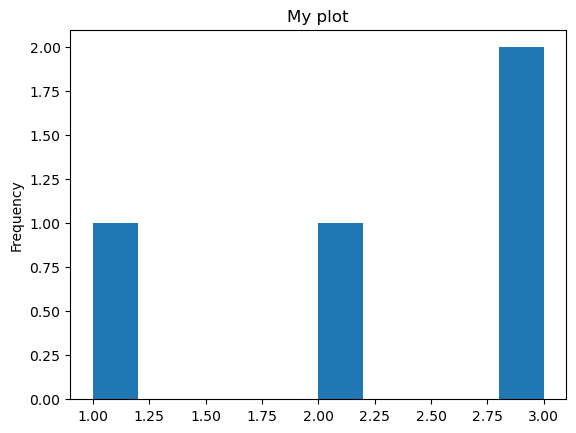

In [70]:
ser = pd.Series([1, 2, 3, 3])
plot = ser.plot(kind='hist', title="My plot")

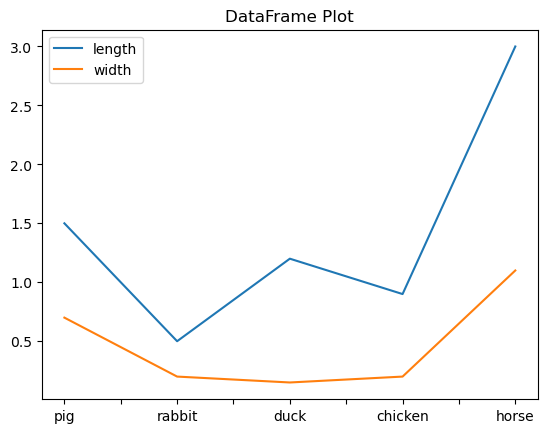

In [100]:
>>> df = pd.DataFrame({'length': [1.5, 0.5, 1.2, 0.9, 3],
...                   'width': [0.7, 0.2, 0.15, 0.2, 1.1]},
...                   index=['pig', 'rabbit', 'duck', 'chicken', 'horse'])
>>> plot = df.plot(title="DataFrame Plot")

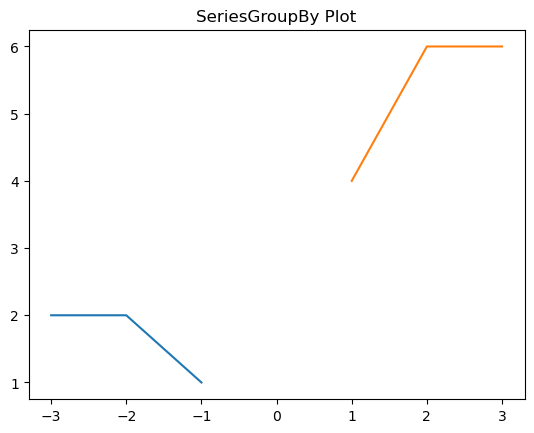

In [101]:
>>> lst = [-1, -2, -3, 1, 2, 3]
>>> ser = pd.Series([1, 2, 2, 4, 6, 6], index=lst)
>>> plot = ser.groupby(lambda x: x > 0).plot(title="SeriesGroupBy Plot")

### plot.area
-> Draw a Stacked area plot.<br>


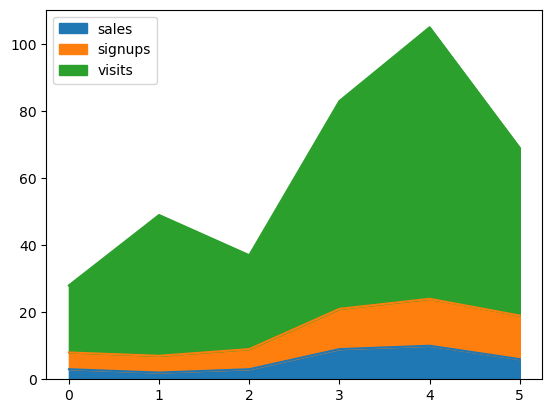

In [77]:
df = pd.DataFrame({
    'sales': [3, 2, 3, 9, 10, 6],
    'signups': [5, 5, 6, 12, 14, 13],
    'visits': [20, 42, 28, 62, 81, 50],
})
ax = df.plot.area()

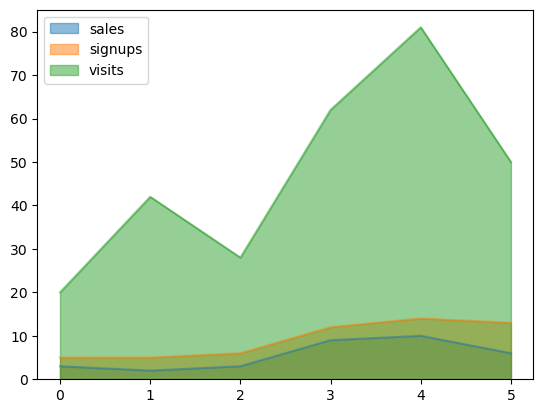

In [75]:
ax = df.plot.area(stacked=False)

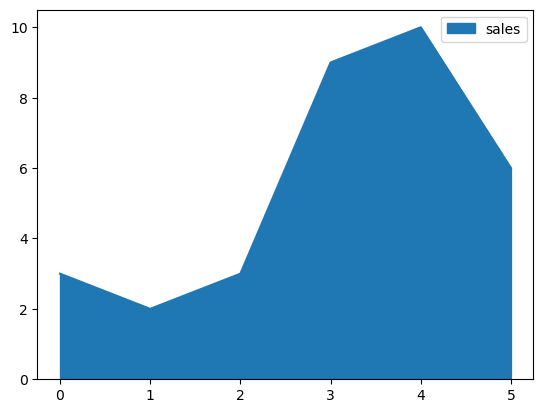

In [78]:
ax = df.plot.area(y='sales')

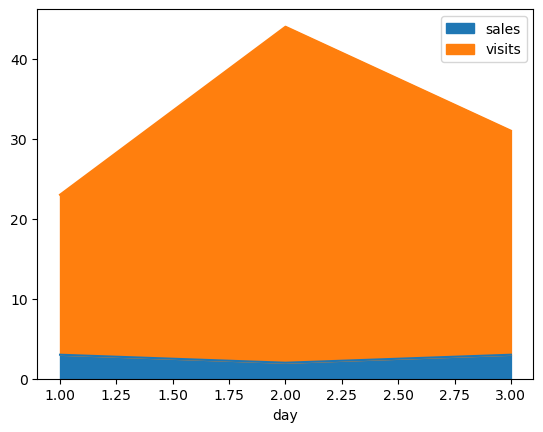

In [79]:
df = pd.DataFrame({
    'sales': [3, 2, 3],
    'visits': [20, 42, 28],
    'day': [1, 2, 3],
})
ax = df.plot.area(x='day')

# DataFrame

DataFrame is 2 dimensional, size-mutable, potentially heterogeneous tabular data.

### Attributes and Underlying data

## index
-> The index of the Dataframe

In [2]:
import pandas as pd
import numpy as np
df = pd.DataFrame({'Name': ['Alice', 'Bob', 'Aritra'],
                   'Age': [25, 30, 35],
                   'Location': ['Seattle', 'New York', 'Kona']},
                  index=([10, 20, 30]))
df

,Name,Age,Location
10,Alice,25,Seattle
20,Bob,30,New York
30,Aritra,35,Kona


In [3]:
df.index

Int64Index([10, 20, 30], dtype='int64')

#### Altering the index of the dataframe

In [4]:
df.index=[1,2,3]
df

,Name,Age,Location
1,Alice,25,Seattle
2,Bob,30,New York
3,Aritra,35,Kona


### The columns labels of the DataFrame.

In [5]:
df.columns

Index(['Name', 'Age', 'Location'], dtype='object')

#### dtypes
-> Return the dtypes in the DataFrame.<br>
-> This returns a series with the data type of each column. The results index is the original dataframe's columns.

In [6]:
df.dtypes

Name        object
Age          int64
Location    object
dtype: object

In [7]:
df = pd.DataFrame({'float': [1.0],
                   'int': [1],
                   'datetime': [pd.Timestamp('20180310')],
                   'string': ['foo']})
df.dtypes

float              float64
int                  int64
datetime    datetime64[ns]
string              object
dtype: object

### info
-> Print a concise summary of a DataFrame<br>
-> Retursn information abt a DataFrame including the index dtype and columns, non null values and memory usage.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   float     1 non-null      float64       
 1   int       1 non-null      int64         
 2   datetime  1 non-null      datetime64[ns]
 3   string    1 non-null      object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 164.0+ bytes


In [10]:
df

,float,int,datetime,string
0,1.0,1,2018-03-10,foo


In [11]:
int_values = [1, 2, 3, 4, 5]
text_values = ['alpha', 'beta', 'gamma', 'delta', 'epsilon']
float_values = [0.0, 0.25, 0.5, 0.75, 1.0]
df = pd.DataFrame({"int_col": int_values, "text_col": text_values,
                  "float_col": float_values})
df

,int_col,text_col,float_col
0,1,alpha,0.00
1,2,beta,0.25
2,3,gamma,0.50
3,4,delta,0.75
4,5,epsilon,1.00


### select_dtypes
-> return a subset of the Dataframes columns based on the column dtypes.

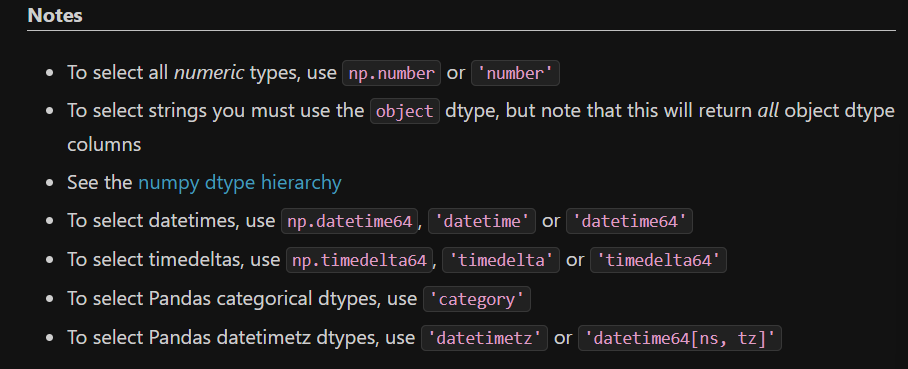

In [13]:
df = pd.DataFrame({'a': [1, 2] * 3,
                   'b': [True, False] * 3,
                   'c': [1.0, 2.0] * 3})
df

,a,b,c
0,1,True,1.0
1,2,False,2.0
2,1,True,1.0
3,2,False,2.0
4,1,True,1.0
5,2,False,2.0


In [17]:
df.select_dtypes(['bool']), df.select_dtypes('float')

(       b
 0   True
 1  False
 2   True
 3  False
 4   True
 5  False,
      c
 0  1.0
 1  2.0
 2  1.0
 3  2.0
 4  1.0
 5  2.0)

In [18]:
df.select_dtypes(['bool','float'])

,b,c
0,True,1.0
1,False,2.0
2,True,1.0
3,False,2.0
4,True,1.0
5,False,2.0


### values
-> Return a numpy representation of the Dataframe.<br>
(official Doc says to use np.to_numpy instead)

In [19]:
df.values

array([[1, True, 1.0],
       [2, False, 2.0],
       [1, True, 1.0],
       [2, False, 2.0],
       [1, True, 1.0],
       [2, False, 2.0]], dtype=object)

### axes 

-> Return a list representing the axes of the DataFrame (X,Y).

In [21]:
df.axes # x n y variables.

[RangeIndex(start=0, stop=6, step=1), Index(['a', 'b', 'c'], dtype='object')]

In [24]:
df.shape #return the shape of the dataframe.

(6, 3)

In [26]:
df.empty # indicates whether Series/dataframe is empty.

False

## Conversion

### astype
-> Cast a pandas object to a specified dtype.

In [27]:
d = {'col1': [1, 2], 'col2': [3, 4]}
df = pd.DataFrame(data=d)
df.dtypes

col1    int64
col2    int64
dtype: object

In [28]:
df['col1'].astype('float')

0    1.0
1    2.0
Name: col1, dtype: float64

In [30]:
df.dtypes

col1    int64
col2    int64
dtype: object

In [32]:
df.astype({'col1': 'int32'}).dtypes

col1    int32
col2    int64
dtype: object

In [33]:
ser = pd.Series([1, 2], dtype='int32')
ser

0    1
1    2
dtype: int32

#### If you want to make changes in place you have to assign a new variable.

In [41]:
ser=ser.astype('int64', copy=True)

In [42]:
ser

0    1
1    2
dtype: int64

### infer_objects, convert_dtypes

#### attempt to infer better dtypes for object columns,.

In [51]:
df = pd.DataFrame({"A": ["a", 1, 2, 3]})
df = df.iloc[1:]
df

,A
1,1
2,2
3,3


In [52]:
df.dtypes

A    object
dtype: object

In [53]:
df.infer_objects().dtypes

A    int64
dtype: object

### copy
-> deep copy (modifications done on this copy wont reflect on the main one)<br>
-> shallow copy {deep=False}, modifications done to the copy one will reflect on the original one.

In [54]:
s = pd.Series([1, 2], index=["a", "b"])
pippu=s.copy()

In [56]:
pippu.index=['Oas','daa']
pippu

Oas    1
daa    2
dtype: int64

In [58]:
s.index=['as','bs']

In [59]:
pippu

Oas    1
daa    2
dtype: int64

## Indexing, Iteration

head, tail, 

### at
-> Access a single value for a row/column label pair.

In [60]:
df = pd.DataFrame([[0, 2, 3], [0, 4, 1], [10, 20, 30]],
                  index=[4, 5, 6], columns=['A', 'B', 'C'])
df

,A,B,C
4,0,2,3
5,0,4,1
6,10,20,30


In [69]:
df['B'][4]

2

In [71]:
df.at[4,"B"]

2

In [72]:
df.at[4, 'B'] = 10
df.at[4, 'B']

10

In [73]:
df

,A,B,C
4,0,10,3
5,0,4,1
6,10,20,30


### iat
-> Access a single value for a row/column pair by integer position

In [74]:
df = pd.DataFrame([[0, 2, 3], [0, 4, 1], [10, 20, 30]],
                  columns=['A', 'B', 'C'])
df

,A,B,C
0,0,2,3
1,0,4,1
2,10,20,30


In [76]:
df.iat[1,2] #'C' is 2

1

In [77]:
df.iat[1, 2] = 10
df.iat[1, 2]

10

#### insert
-> Insert column into DataFrame at specified location

In [85]:
df = pd.DataFrame({'col1': [1, 2], 'col2': [3, 4]})
df

,col1,col2
0,1,3
1,2,4


In [86]:
df.insert(1,'new', [323,43])
df

,col1,new,col2
0,1,323,3
1,2,43,4


In [87]:
df.insert(0, "col1", [100, 100], allow_duplicates=True)
df

,col1,col1,new,col2
0,100,1,323,3
1,100,2,43,4


#### Notice pandas uses index alignment in case of value from type series.

In [88]:
df.insert(0, "col0", pd.Series([5, 6], index=[1, 2]))
df

,col0,col1,col1,new,col2
0,NaN,100,1,323,3
1,5.0,100,2,43,4


items, values, keys, 

### pop
-> Return item and drop from frame. Raise keyerror if not found.

In [89]:
df = pd.DataFrame([('falcon', 'bird', 389.0),
                   ('parrot', 'bird', 24.0),
                   ('lion', 'mammal', 80.5),
                   ('monkey', 'mammal', np.nan)],
                  columns=('name', 'class', 'max_speed'))
df

,name,class,max_speed
0,falcon,bird,389.0
1,parrot,bird,24.0
2,lion,mammal,80.5
3,monkey,mammal,NaN


In [90]:
df.pop('class')

0      bird
1      bird
2    mammal
3    mammal
Name: class, dtype: object

In [91]:
df

,name,max_speed
0,falcon,389.0
1,parrot,24.0
2,lion,80.5
3,monkey,NaN


### where
-> replace values where the condition is False.

In [92]:
df = pd.DataFrame(np.arange(10).reshape(-1, 2), columns=['A', 'B'])
df

,A,B
0,0,1
1,2,3
2,4,5
3,6,7
4,8,9


In [93]:
m = df % 3 == 0
df.where(m, -df)

,A,B
0,0,-1
1,-2,3
2,-4,-5
3,6,-7
4,-8,9


In [94]:
df.where(m, -df) == np.where(m, df, -df)

,A,B
0,True,True
1,True,True
2,True,True
3,True,True
4,True,True


In [95]:
df.where(m, -df) == df.mask(~m, -df)

,A,B
0,True,True
1,True,True
2,True,True
3,True,True
4,True,True


## Binary operator Functions


add, sub, mul, div, floordiv, mod, pow (exponential pow), dot, lt, gt, le, ge, ne, eq,

### combine
-> Perform column wise combine with another DataFrame<br>
-> Combines a DataFrame with other DataFrame using func to element-wise combine columns. The row and column indexes of the resulting DataFrame will be the union of the two.

In [96]:
df1 = pd.DataFrame({'A': [5, 0], 'B': [2, 4]})
df2 = pd.DataFrame({'A': [1, 1], 'B': [3, 3]})
df1.combine(df2, np.minimum)

,A,B
0,1,2
1,0,3


## Function applicaation, GroupBy & Window

### apply
-> Apply a function along an axis of the DataFrame.

In [3]:
df = pd.DataFrame([[4, 9]] * 3, columns=['A', 'B'])
df

,A,B
0,4,9
1,4,9
2,4,9


In [4]:
df.apply(np.sqrt)

,A,B
0,2.0,3.0
1,2.0,3.0
2,2.0,3.0


In [5]:
df.apply(np.sum, axis=0)

A    12
B    27
dtype: int64

In [6]:
df.apply(np.sum, axis=1)

0    13
1    13
2    13
dtype: int64

In [7]:
df.apply(lambda x:[1,2], axis=1)

0    [1, 2]
1    [1, 2]
2    [1, 2]
dtype: object

### map (applymap is deprecated and it is renamed as map)

In [12]:
df = pd.DataFrame([[1.9, 2.12], [3.356, 4.567]])
df

,0,1
0,1.900,2.120
1,3.356,4.567


In [14]:
df.applymap(lambda x: len(str(x))) # 1.9 (1, ., 9) [count 3]

,0,1
0,3,4
1,5,5


### agg/ aggregate
-> Aggregate usng one or more operations over the specified axis.<br>

-> The aggregation operations are always performed over an axis, either the index or the column axis. This behavior is different from numpy aggregation functions, where the default is to compute the aggregation of the <b>flattened array</b> 

In [7]:
df = pd.DataFrame([[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9],
                   [np.nan, np.nan, np.nan]],
                  columns=['A', 'B', 'C'])
df

,A,B,C
0,1.0,2.0,3.0
1,4.0,5.0,6.0
2,7.0,8.0,9.0
3,NaN,NaN,NaN


In [5]:
df.agg(['sum','min'])

,A,B,C
sum,12.0,15.0,18.0
min,1.0,2.0,3.0


#### different aggregations per column.

In [6]:
df.agg({'A' : ['sum', 'min'], 'B' : ['min', 'max']})

,A,B
sum,12.0,NaN
min,1.0,2.0
max,NaN,8.0


In [8]:
df.agg("mean", axis="columns")

0    2.0
1    5.0
2    8.0
3    NaN
dtype: float64

### transform 
-> Call func on self producing a DataFrame with the same axis shape as self.

In [9]:
df = pd.DataFrame({'A': range(3), 'B': range(1, 4)})
df

,A,B
0,0,1
1,1,2
2,2,3


In [10]:
df.transform(lambda x: x + 1)

,A,B
0,1,2
1,2,3
2,3,4


#### Even though the resulting DataFrame must have the same length as the input DataFrame, it is possible to provide several input functions.

In [14]:
s = pd.Series(range(1,4),index=['A','B','C'])
s

A    1
B    2
C    3
dtype: int64

In [15]:
s.transform([np.sqrt, np.exp])

,sqrt,exp
A,1.000000,2.718282
B,1.414214,7.389056
C,1.732051,20.085537


In [16]:
df = pd.DataFrame({
    "c": [1, 1, 1, 2, 2, 2, 2],
    "type": ["m", "n", "o", "m", "m", "n", "n"]
})
df

,c,type
0,1,m
1,1,n
2,1,o
3,2,m
4,2,m
5,2,n
6,2,n


In [24]:
df['size']=df.groupby('type')['c'].transform(len)
df

,c,type,size
0,1,m,3
1,1,n,3
2,1,o,1
3,2,m,3
4,2,m,3
5,2,n,3
6,2,n,3


In [25]:
df['size']=df.groupby('c')['type'].transform(len)
df

,c,type,size
0,1,m,3
1,1,n,3
2,1,o,3
3,2,m,4
4,2,m,4
5,2,n,4
6,2,n,4


### GroupBy
-> Group DataFrame using a mapper or by a Series of columns.

In [26]:
df = pd.DataFrame({'Animal': ['Falcon', 'Falcon',
                              'Parrot', 'Parrot'],
                   'Max Speed': [380., 370., 24., 26.]})
df

,Animal,Max Speed
0,Falcon,380.0
1,Falcon,370.0
2,Parrot,24.0
3,Parrot,26.0


In [28]:
list(df.groupby(['Animal']))

C:\Users\saiga\AppData\Local\Temp\ipykernel_9572\2612058426.py:1: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  list(df.groupby(['Animal']))


[('Falcon',
     Animal  Max Speed
  0  Falcon      380.0
  1  Falcon      370.0),
 ('Parrot',
     Animal  Max Speed
  2  Parrot       24.0
  3  Parrot       26.0)]

In [29]:
df.groupby(['Animal']).mean()

,Max Speed
Animal,
Falcon,375.0
Parrot,25.0


In [30]:
l = [[1, 2, 3], [1, None, 4], [2, 1, 3], [1, 2, 2]]
df = pd.DataFrame(l, columns=["a", "b", "c"])

In [31]:
df.groupby(['b']).sum()

,a,c
b,,
1.0,2,3
2.0,2,5


#### We can also choose to include NA in group keys or not by setting dropna parameter, the default setting is True.

In [32]:
df.groupby(['b'], dropna=False).sum()

,a,c
b,,
1.0,2,3
2.0,2,5
NaN,1,4


#### when using .apply(), use group_keys to include or exclude the group keys. The group_keys argument defaults to True

In [36]:
df = pd.DataFrame({'Animal': ['Falcon', 'Falcon',
                              'Parrot', 'Parrot'],
                   'Max Speed': [380., 370., 24., 26.]})
df.groupby("Animal", group_keys=True).apply(lambda x: x)

Animal  Max Speed
Animal                     
Falcon 0  Falcon      380.0
       1  Falcon      370.0
Parrot 2  Parrot       24.0
       3  Parrot       26.0

## Computations / descriptive Stats

all, any, corr, count, cov, cummax, cummin, cumprod, describe, diff, kurt, max, mean, median, min, mode, prod, skew, sum , std, var, nunique, value_counts.

In [37]:
s = pd.Series([-1.10, 2, -3.33, 4])
s.abs()

0    1.10
1    2.00
2    3.33
3    4.00
dtype: float64

### clip 
-> Trim values at input thresholds.

In [38]:
data = {'col_0': [9, -3, 0, -1, 5], 'col_1': [-2, -7, 6, 8, -5]}
df = pd.DataFrame(data)
df

,col_0,col_1
0,9,-2
1,-3,-7
2,0,6
3,-1,8
4,5,-5


In [39]:
df.clip(-4, 6)

,col_0,col_1
0,6,-2
1,-3,-4
2,0,6
3,-1,6
4,5,-4


In [40]:
df = pd.DataFrame({"Person":
                   ["John", "Myla", "Lewis", "John", "Myla"],
                   "Age": [24., np.nan, 21., 33, 26],
                   "Single": [False, True, True, True, False]})
df

,Person,Age,Single
0,John,24.0,False
1,Myla,NaN,True
2,Lewis,21.0,True
3,John,33.0,True
4,Myla,26.0,False


In [41]:
df.count()

Person    5
Age       4
Single    5
dtype: int64

## Reindexing / selection / label manipulation

align

### drop
-> Drop specified labels from rows or columns.

In [44]:
df = pd.DataFrame(np.arange(12).reshape(3, 4),
                  columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11


In [46]:
df.drop(['B','C'],axis=1)

,A,D
0,0,3
1,4,7
2,8,11


In [47]:
df.drop([0, 1], axis=0)

,A,B,C,D
2,8,9,10,11


### drop_duplicates
-> Return DataFrame with duplicate rows removed.

In [48]:
df = pd.DataFrame({
    'brand': ['Yum Yum', 'Yum Yum', 'Indomie', 'Indomie', 'Indomie'],
    'style': ['cup', 'cup', 'cup', 'pack', 'pack'],
    'rating': [4, 4, 3.5, 15, 5]
})
df

,brand,style,rating
0,Yum Yum,cup,4.0
1,Yum Yum,cup,4.0
2,Indomie,cup,3.5
3,Indomie,pack,15.0
4,Indomie,pack,5.0


In [49]:
df.drop_duplicates()

,brand,style,rating
0,Yum Yum,cup,4.0
2,Indomie,cup,3.5
3,Indomie,pack,15.0
4,Indomie,pack,5.0


In [50]:
df.drop_duplicates(['brand'])

,brand,style,rating
0,Yum Yum,cup,4.0
2,Indomie,cup,3.5


### duplicated
-> Return boolean series denoting duplicate rows.

In [51]:
df = pd.DataFrame({
    'brand': ['Yum Yum', 'Yum Yum', 'Indomie', 'Indomie', 'Indomie'],
    'style': ['cup', 'cup', 'cup', 'pack', 'pack'],
    'rating': [4, 4, 3.5, 15, 5]
})
df.duplicated()

0    False
1     True
2    False
3    False
4    False
dtype: bool

### filter
-> Subset the dataframe rows or columns according to the specified index labels.

In [52]:
df = pd.DataFrame(np.array(([1, 2, 3], [4, 5, 6])),
                  index=['mouse', 'rabbit'],
                  columns=['one', 'two', 'three'])
df

,one,two,three
mouse,1,2,3
rabbit,4,5,6


In [53]:
df.filter(items=['one','three'])

,one,three
mouse,1,3
rabbit,4,6


### rename
-> Rename columns or index labels<br>
-> Either index or column can be renamed

In [55]:
df = pd.DataFrame({"A": [1, 2, 3], "B": [4, 5, 6]})
# Renaming the columns
df.rename(columns={"A": "a", "B": "c"})

,a,c
0,1,4
1,2,5
2,3,6


In [56]:
df.rename(index={0:'x',1:'y',2:'z'})

,A,B
x,1,4
y,2,5
z,3,6


####  rename axis of the table we can do this using the rename_axis method in pandas.

In [57]:
s = pd.Series(["dog", "cat", "monkey"])
s

0       dog
1       cat
2    monkey
dtype: object

In [58]:
s.rename_axis('animal')

animal
0       dog
1       cat
2    monkey
dtype: object

### reset_index
-> Reset the index, or a level of it.

In [59]:
df = pd.DataFrame([('bird', 389.0),
                   ('bird', 24.0),
                   ('mammal', 80.5),
                   ('mammal', np.nan)],
                  index=['falcon', 'parrot', 'lion', 'monkey'],
                  columns=('class', 'max_speed'))
df

,class,max_speed
falcon,bird,389.0
parrot,bird,24.0
lion,mammal,80.5
monkey,mammal,NaN


<b>when we reset the index, the old index is added as a column, and a new sequential index is used.

In [63]:
df.reset_index(inplace=True)

In [65]:
df

,index,class,max_speed
0,falcon,bird,389.0
1,parrot,bird,24.0
2,lion,mammal,80.5
3,monkey,mammal,NaN


In [69]:
df.columns

Index(['index', 'class', 'max_speed'], dtype='object')

### sample 
-> return a random sample of items from an axis of object.

### truncate
-> Truncate a series or DataFrame before and after some index value.

## Missing data Handling

bfill, ffill, dropna, fillna, isna, isnull, isna, notna, notnull

### replace
-> Replace values given in to_replace with value.

In [70]:
s = pd.Series([1, 2, 3, 4, 5])
s.replace(1, 5)

0    5
1    2
2    3
3    4
4    5
dtype: int64

In [71]:
df = pd.DataFrame({'A': [0, 1, 2, 3, 4],
                   'B': [5, 6, 7, 8, 9],
                   'C': ['a', 'b', 'c', 'd', 'e']})
df.replace(0, 5)

,A,B,C
0,5,5,a
1,1,6,b
2,2,7,c
3,3,8,d
4,4,9,e


### Reshaping, Sorting, transposing

T, transpose, pivot, sort_values(Sort by the values along either axis), sort_index (Sort object by labels), 

### pivot_table
-> Create a spreadsheet style pivot table as DataFrame.

In [98]:
df = pd.DataFrame({"A": ["foo", "foo", "foo", "foo", "foo",
                         "bar", "bar", "bar", "bar"],
                   "B": ["one", "one", "one", "two", "two",
                         "one", "one", "two", "two"],
                   "C": ["small", "large", "large", "small",
                         "small", "large", "small", "small",
                         "large"],
                   "D": [1, 2, 2, 3, 3, 4, 5, 6, 7],
                   "E": [2, 4, 5, 5, 6, 6, 8, 9, 9]})
df

,A,B,C,D,E
0,foo,one,small,1,2
1,foo,one,large,2,4
2,foo,one,large,2,5
3,foo,two,small,3,5
4,foo,two,small,3,6
5,bar,one,large,4,6
6,bar,one,small,5,8
7,bar,two,small,6,9
8,bar,two,large,7,9


In [101]:
table = pd.pivot_table(df, values='D', index=['A','B'],
                       columns=['C'], aggfunc="sum")
table

C        large  small
A   B                
bar one    4.0    5.0
    two    7.0    6.0
foo one    4.0    1.0
    two    NaN    6.0

We can also fill missing values using the fill_value parameter.

In [102]:
table = pd.pivot_table(df, values='D', index=['A', 'B'],
                       columns=['C'], aggfunc="sum", fill_value=0)
table

C        large  small
A   B                
bar one      4      5
    two      7      6
foo one      4      1
    two      0      6

### sort_values
-> Sort by the values along either axis

In [103]:
df = pd.DataFrame({
    'col1': ['A', 'A', 'B', np.nan, 'D', 'C'],
    'col2': [2, 1, 9, 8, 7, 4],
    'col3': [0, 1, 9, 4, 2, 3],
    'col4': ['a', 'B', 'c', 'D', 'e', 'F']
})
df

,col1,col2,col3,col4
0,A,2,0,a
1,A,1,1,B
2,B,9,9,c
3,NaN,8,4,D
4,D,7,2,e
5,C,4,3,F


In [106]:
df.sort_values(['col1'],ignore_index=True)
# the ignore_index will helps to make a new index 

,col1,col2,col3,col4
0,A,2,0,a
1,A,1,1,B
2,B,9,9,c
3,C,4,3,F
4,D,7,2,e
5,NaN,8,4,D


### stack / unstack
-> Stack the prescribed levels from columns to index.<br>
-> Unstack (Pivot a level of the index labels).

In [113]:
df_single_level_cols = pd.DataFrame([[0, 1], [2, 3]],
                                    index=['cat', 'dog'],
                                    columns=['weight', 'height'])

In [114]:
df_single_level_cols

,weight,height
cat,0,1
dog,2,3


In [115]:
alp=df_single_level_cols.stack()
alp

cat  weight    0
     height    1
dog  weight    2
     height    3
dtype: int64

In [117]:
alp.unstack()

,weight,height
cat,0,1
dog,2,3


In [110]:
index = pd.MultiIndex.from_tuples([('one', 'a'), ('one', 'b'),
                                   ('two', 'a'), ('two', 'b')])
s = pd.Series(np.arange(1.0, 5.0), index=index)
s

one  a    1.0
     b    2.0
two  a    3.0
     b    4.0
dtype: float64

In [111]:
s.unstack(level=-1)

,a,b
one,1.0,2.0
two,3.0,4.0


### explode 
-> Transform each element of a list-like to a row, replicating index values.

In [118]:
df = pd.DataFrame({'A': [[0, 1, 2], 'foo', [], [3, 4]],
                   'B': 1,
                   'C': [['a', 'b', 'c'], np.nan, [], ['d', 'e']]})
df

,A,B,C
0,"[0, 1, 2]",1,"[a, b, c]"
1,foo,1,NaN
2,[],1,[]
3,"[3, 4]",1,"[d, e]"


In [120]:
df.explode('A')
# We could use this concept in the Project which we are doing.

,A,B,C
0,0,1,"[a, b, c]"
0,1,1,"[a, b, c]"
0,2,1,"[a, b, c]"
1,foo,1,NaN
2,NaN,1,[]
3,3,1,"[d, e]"
3,4,1,"[d, e]"


Multi column explode.

In [121]:
df.explode(list('AC'))

,A,B,C
0,0,1,a
0,1,1,b
0,2,1,c
1,foo,1,NaN
2,NaN,1,NaN
3,3,1,d
3,4,1,e


### Combining / comparing / joining / merge

### assign
-> Assign new columns to a DataFrame.

In [72]:
df = pd.DataFrame({'temp_c': [17.0, 25.0]},
                  index=['Portland', 'Berkeley'])
df

,temp_c
Portland,17.0
Berkeley,25.0


In [77]:
df.assign(temp_f=lambda x: x.temp_c * 9 / 5 + 32)

,temp_c,temp_f
Portland,17.0,62.6
Berkeley,25.0,77.0


### join  
#### Even though this exists we might use the merge method to join tables 
-> Join columns of another DataFrame.

In [78]:
df = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3', 'K4', 'K5'],
                   'A': ['A0', 'A1', 'A2', 'A3', 'A4', 'A5']})

In [79]:
other = pd.DataFrame({'key': ['K0', 'K1', 'K2'],
                      'B': ['B0', 'B1', 'B2']})

In [80]:
df

,key,A
0,K0,A0
1,K1,A1
2,K2,A2
3,K3,A3
4,K4,A4
5,K5,A5


In [81]:
other

,key,B
0,K0,B0
1,K1,B1
2,K2,B2


In [83]:
df.join(other, lsuffix='_df',rsuffix='_oth')

,key_df,A,key_oth,B
0,K0,A0,K0,B0
1,K1,A1,K1,B1
2,K2,A2,K2,B2
3,K3,A3,NaN,NaN
4,K4,A4,NaN,NaN
5,K5,A5,NaN,NaN


### merge 
-> To perform sQL type, use this method to accomplish your task.

In [93]:
df1 = pd.DataFrame({'lkey': ['foo', 'bar', 'baz', 'foo'],
                    'value': [1, 2, 3, 5]})
df2 = pd.DataFrame({'rkey': ['foo', 'bar', 'baz', 'foo'],
                    'value': [5, 6, 7, 8]})

In [94]:
df1.merge(df2, left_on='lkey', right_on='rkey')

,lkey,value_x,rkey,value_y
0,foo,1,foo,5
1,foo,1,foo,8
2,foo,5,foo,5
3,foo,5,foo,8
4,bar,2,bar,6
5,baz,3,baz,7


In [95]:
df1 = pd.DataFrame({'a': ['foo', 'bar'], 'b': [1, 2]})
df2 = pd.DataFrame({'a': ['foo', 'baz'], 'c': [3, 4]})

In [96]:
df1.merge(df2, how='inner', on='a')

,a,b,c
0,foo,1,3


In [97]:
df1.merge(df2, how='left', on='a')

,a,b,c
0,foo,1,3.0
1,bar,2,NaN


### update
-> Modify in place using Non NA values from another DataFrame.

# Index Objects

### index [We haven't elobrated the methods, as most of them are similar to methods what we seen in the Series]
-> Immutable sequence used for indexing and alignment.

-> has_duplicates, <br>
-> all (0 is considered as False , NaN, + infinity and - infinity evaluate to True, because these are not equal to 0.<br>
-> astype (For casting the dtype of the data in dataframe).<br>
-> copy (deep) <br>
-> delete (make new index with passed locations deleted) <br>
-> drop (drop particular value)<br>
-> duplicated (Indicate duplicate index values.) <br>
-> factorize (Encode the object as an enumerated type or categorical value.<br>
-> get_loc() -> Get integer location, slice or boolean mask for requested label <br>
-> append , join, intersection, union, difference<br>
-> identical (similar to equals but checks that object attributes and types are also equal.<br>
-> insert (make new index inserting new item at location).<br>
-> is_categorical, is_floating, is_integer, is_boolean, is_numeric, is_object, <br>
-> to_frame (Create a DataFrame with a column containing the Index.<br>
-> to_list, to_numpy, to_series, tolist<br>
-> value_counts<br>
-> where (Replace values where the condition is False) 

## GroupBy

In [29]:
lst = ['a', 'a', 'b']
ser = pd.Series([1, 2, 3], index=lst)
ser

a    1
a    2
b    3
dtype: int64

In [30]:
ser.groupby(level=0).groups

{'a': ['a', 'a'], 'b': ['b']}

In [31]:
data = [[1, 2, 3], [1, 5, 6], [7, 8, 9]]
df = pd.DataFrame(data, columns=["a", "b", "c"])
df

,a,b,c
0,1,2,3
1,1,5,6
2,7,8,9


In [34]:
df.groupby(by=['a']).groups

{1: [0, 1], 7: [2]}

In [35]:
lst = ['a', 'b', 'a']
ser = pd.Series([1, 2, 3], index=lst)
ser

a    1
b    2
a    3
dtype: int64

In [36]:
ser.groupby(level=0).indices

{'a': array([0, 2], dtype=int64), 'b': array([1], dtype=int64)}

In [37]:
data = [[1, 2, 3], [1, 5, 6], [7, 8, 9]]
df = pd.DataFrame(data, columns=["a", "b", "c"],
                  index=["owl", "toucan", "eagle"])
df

,a,b,c
owl,1,2,3
toucan,1,5,6
eagle,7,8,9


In [38]:
df.groupby(by=['a']).indices

{1: array([0, 1], dtype=int64), 7: array([2], dtype=int64)}

### Aggregate/agg for both series and Dataframes

In [3]:
s = pd.Series([1, 2, 3, 4])

In [4]:
s.groupby([1, 1, 3, 2]).min()  
#this makes gives the [1,1,3,2] to [1,2,3,4]
# and for if [1,1] -> [1,2]
# for [3] -> [3]
# [2] -> [4]
# From these we could see that the min of [1,2] is 1
# 3 is 3 and for [4] it is 4

1    1
2    4
3    3
dtype: int64

In [5]:
s.groupby([1, 1, 3, 2]).max()
# this is why we would get the 2 at the first place.

1    2
2    4
3    3
dtype: int64

In [6]:
s.groupby([1, 1, 2, 2]).agg('min')

1    1
2    3
dtype: int64

In [7]:
s.groupby([1, 1, 2, 2]).agg(['min','max'])

,min,max
1,1,2
2,3,4


In [8]:
>>> df = pd.DataFrame(
...     {
...         "A": [1, 1, 2, 2],
...         "B": [1, 2, 3, 4],
...         "C": [0.362838, 0.227877, 1.267767, -0.562860],
...     }
... )

In [9]:
df

,A,B,C
0,1,1,0.362838
1,1,2,0.227877
2,2,3,1.267767
3,2,4,-0.562860


In [11]:
df.groupby('A').agg('min')
# We get 2 groups 1 and 2 (And from grp 1 it is 0.36 and 0.22) the smaller is 0.22
# whereas from the other group (2) it is 1.26 and -0.56 the smaller is -0.56

,B,C
A,,
1,1,0.227877
2,3,-0.562860


#### Different aggregations per column

In [12]:
df.groupby('A').agg({'B':['min','max'],'C':sum})

B             C
  min max       sum
A                  
1   1   2  0.590715
2   3   4  0.704907

### transform

In [20]:
ser = pd.Series(
   [390.0, 350.0, 30.0, 20.0],
   index=["Falcon", "Falcon", "Parrot", "Parrot"])
grouped = ser.groupby([1, 1, 2, 2])
grouped.transform(lambda x: (x - x.mean()) / x.std())

Falcon    0.707107
Falcon   -0.707107
Parrot    0.707107
Parrot   -0.707107
dtype: float64

In [21]:
grouped.transform(lambda x: x.max() - x.min())

Falcon    40.0
Falcon    40.0
Parrot    10.0
Parrot    10.0
dtype: float64

In [22]:
grouped.transform("mean")

Falcon    370.0
Falcon    370.0
Parrot     25.0
Parrot     25.0
dtype: float64

### filter
-> Filter elements from groups that don't satisfy a criterion.

In [23]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar','foo', 'bar'],
                   'B' : [1, 2, 3, 4, 5, 6],
                   'C' : [2.0, 5., 8., 1., 2., 9.]})
grouped = df.groupby('A')
df.groupby('A').B.filter(lambda x: x.mean() > 3.)

1    2
3    4
5    6
Name: B, dtype: int64

In [27]:
list(df.groupby('A'))
# This is why you would get only the 2, 4, 6, elements.

[('bar',
       A  B    C
  1  bar  2  5.0
  3  bar  4  1.0
  5  bar  6  9.0),
 ('foo',
       A  B    C
  0  foo  1  2.0
  2  foo  3  8.0
  4  foo  5  2.0)]

### groupby.any / groupby.all 
-> Return True if any value in the group is truthful, else False.

In [28]:
data = [[1, 0, 3], [1, 0, 6], [7, 1, 9]]
df = pd.DataFrame(data, columns=["a", "b", "c"],
                  index=["ostrich", "penguin", "parrot"])
df

,a,b,c
ostrich,1,0,3
penguin,1,0,6
parrot,7,1,9


In [29]:
df.groupby('a').any()

,b,c
a,,
1,False,True
7,True,True


In [30]:
data = [[1, 1, 3], [1, 1, 6], [7, 1, 9]]
df1 = pd.DataFrame(data, columns=["a", "b", "c"],
                  index=["ostrich", "penguin", "parrot"])
df1

,a,b,c
ostrich,1,1,3
penguin,1,1,6
parrot,7,1,9


In [32]:
df1.groupby('a').any()
# As all the elements are !=0, we would get True obviously.

,b,c
a,,
1,True,True
7,True,True


### DataFrames computations / descriptive stats.

### all, any, corr, count, cov, cumcount, cummax, cummin, cumprod, cumsum, describe, ffill, fillna, head, idmax, idmin, max, mean , median, min, nunique, skew, std, sum, var, tail, value_counts

### bfill, (Caveat)
-> If 2 // rows doesn't have NaN( having 1 NaN but doesn;t have NaN in the // column, the fill methods doesn't going to fill in the groupby

In [35]:
index = ['Falcon', 'Falcon', 'Parrot', 'Parrot', 'Parrot']
df = pd.DataFrame({'A': [1, None, None, None, 4],'B': [None, None, 5, None, 7]}, index=index)
df

,A,B
Falcon,1.0,NaN
Falcon,NaN,NaN
Parrot,NaN,5.0
Parrot,NaN,NaN
Parrot,4.0,7.0


In [39]:
df.groupby(level=0).bfill()

,A,B
Falcon,1.0,NaN
Falcon,NaN,NaN
Parrot,4.0,5.0
Parrot,4.0,7.0
Parrot,4.0,7.0


In [40]:
df.groupby(level=0).bfill(limit=1)

,A,B
Falcon,1.0,NaN
Falcon,NaN,NaN
Parrot,NaN,5.0
Parrot,4.0,7.0
Parrot,4.0,7.0


In [43]:
data = [[1, np.nan, 3], [1, np.nan, 6], [7, 8, 9]]
df = pd.DataFrame(data, columns=["a", "b", "c"],
                  index=["cow", "horse", "bull"])
df

,a,b,c
cow,1,NaN,3
horse,1,NaN,6
bull,7,8.0,9


In [44]:
df.groupby("a").count()

,b,c
a,,
1,0,2
7,1,1


In [45]:
s = pd.Series([1, 2, 3])
s.describe()

count    3.0
mean     2.0
std      1.0
min      1.0
25%      1.5
50%      2.0
75%      2.5
max      3.0
dtype: float64

In [46]:
s = pd.Series(['a', 'a', 'b', 'c'])
s.describe()

count     4
unique    3
top       a
freq      2
dtype: object

In [47]:
df = pd.DataFrame({'categorical': pd.Categorical(['d','e','f']),
                   'numeric': [1, 2, 3],
                   'object': ['a', 'b', 'c']
                  })

In [48]:
df

,categorical,numeric,object
0,d,1,a
1,e,2,b
2,f,3,c


In [49]:
df.describe()

,numeric
count,3.0
mean,2.0
std,1.0
min,1.0
25%,1.5
50%,2.0
75%,2.5
max,3.0


In [50]:
df.describe(include='all') 

,categorical,numeric,object
count,3,3.0,3
unique,3,NaN,3
top,d,NaN,a
freq,1,NaN,1
mean,NaN,2.0,NaN
std,NaN,1.0,NaN
min,NaN,1.0,NaN
25%,NaN,1.5,NaN
50%,NaN,2.0,NaN
75%,NaN,2.5,NaN


In [51]:
df.numeric.describe()

count    3.0
mean     2.0
std      1.0
min      1.0
25%      1.5
50%      2.0
75%      2.5
max      3.0
Name: numeric, dtype: float64

#### include only object datatype in the output 

In [52]:
df.describe(include=[object])  

,object
count,3
unique,3
top,a
freq,1


#### include only category datatype in the output 

In [53]:
df.describe(include=['category'])

,categorical
count,3
unique,3
top,d
freq,1


#### exclude only number datatype in the output 

In [55]:
df.describe(exclude=[np.number])   # object, categorical

,categorical,object
count,3,3
unique,3,3
top,d,a
freq,1,1


# Resampling

## Function application

### agg/aggregate/apply

In [3]:
s = pd.Series([1, 2, 3, 4, 5],
              index=pd.date_range('20130101', periods=5, freq='s'))
s

2013-01-01 00:00:00    1
2013-01-01 00:00:01    2
2013-01-01 00:00:02    3
2013-01-01 00:00:03    4
2013-01-01 00:00:04    5
Freq: S, dtype: int64

In [4]:
r = s.resample('2s')
r

In [5]:
r.agg('sum')

2013-01-01 00:00:00    3
2013-01-01 00:00:02    7
2013-01-01 00:00:04    5
Freq: 2S, dtype: int64

In [6]:
r.agg(['sum', 'mean', 'max'])

,sum,mean,max
2013-01-01 00:00:00,3,1.5,2
2013-01-01 00:00:02,7,3.5,4
2013-01-01 00:00:04,5,5.0,5


In [7]:
r.agg(average="mean", total="sum")

,average,total
2013-01-01 00:00:00,1.5,3
2013-01-01 00:00:02,3.5,7
2013-01-01 00:00:04,5.0,5


In [8]:
s = pd.Series([1, 2],
              index=pd.date_range('20180101',
                                  periods=2,
                                  freq='1h'))
s

2018-01-01 00:00:00    1
2018-01-01 01:00:00    2
Freq: H, dtype: int64

In [9]:
resampled=s.resample('15min')
resampled.transform(lambda x:(x-x.mean())/x.std())

2018-01-01 00:00:00   NaN
2018-01-01 01:00:00   NaN
Freq: H, dtype: float64

## Upsampling

### ffill, bfill, nearest, fillna, asfreq, interpolate

### asfreq
-> Return the values as the new freq, essentially a reindex.

### The entire resampling package is used on the dates. Also the methods are almost similar to what they had in series.

# Plotting

### bootstrap_plot
-> Bootstrap plot on mean, median, and mid-range statistics.

The bootstrap plot is used to estimate the uncertainty of a statistic by relying on random sampling with replacement. This function will generate bootstrapping plots for mean, median and mid-range statistics for the given number of samples of the given size.

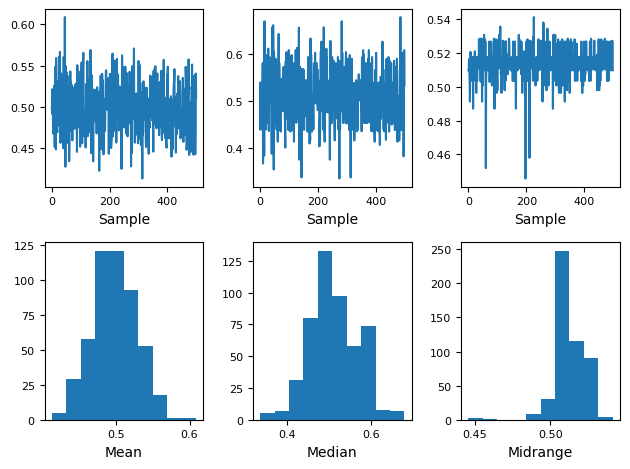

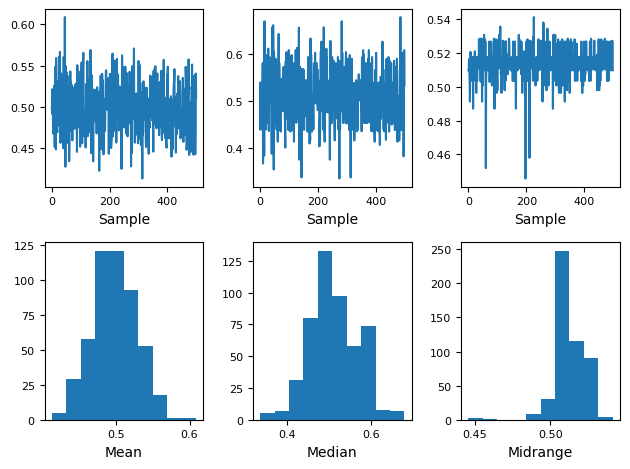

In [16]:
s = pd.Series(np.random.uniform(size=100))
pd.plotting.bootstrap_plot(s)

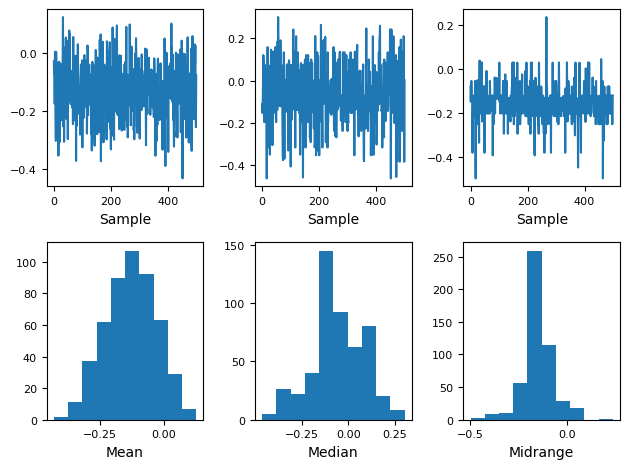

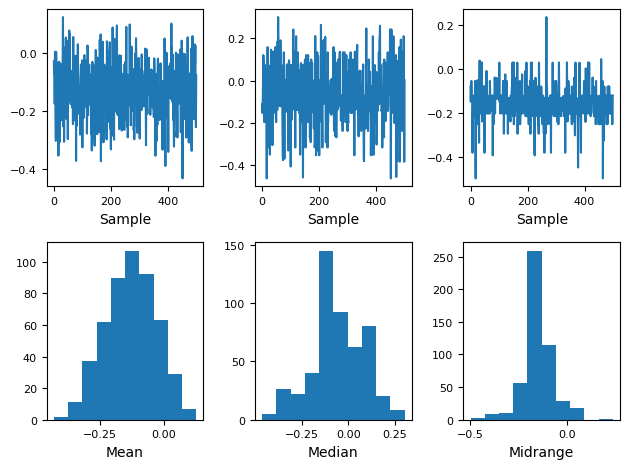

In [21]:
alp=pd.Series(np.random.randn(100))
pd.plotting.bootstrap_plot(alp)

In [23]:
nice=pd.DataFrame({
    'A':np.arange(2,15,2),
    'B':np.arange(1,15,2)
})

In [24]:
nice

,A,B
0,2,1
1,4,3
2,6,5
3,8,7
4,10,9
5,12,11
6,14,13


array([[<Axes: xlabel='A', ylabel='A'>, <Axes: xlabel='B', ylabel='A'>],
       [<Axes: xlabel='A', ylabel='B'>, <Axes: xlabel='B', ylabel='B'>]],
      dtype=object)

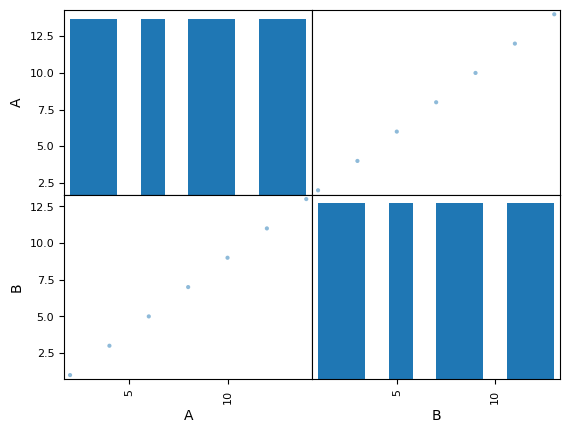

In [25]:
pd.plotting.scatter_matrix(nice)

array([[<Axes: xlabel='A', ylabel='A'>, <Axes: xlabel='B', ylabel='A'>,
        <Axes: xlabel='C', ylabel='A'>, <Axes: xlabel='D', ylabel='A'>],
       [<Axes: xlabel='A', ylabel='B'>, <Axes: xlabel='B', ylabel='B'>,
        <Axes: xlabel='C', ylabel='B'>, <Axes: xlabel='D', ylabel='B'>],
       [<Axes: xlabel='A', ylabel='C'>, <Axes: xlabel='B', ylabel='C'>,
        <Axes: xlabel='C', ylabel='C'>, <Axes: xlabel='D', ylabel='C'>],
       [<Axes: xlabel='A', ylabel='D'>, <Axes: xlabel='B', ylabel='D'>,
        <Axes: xlabel='C', ylabel='D'>, <Axes: xlabel='D', ylabel='D'>]],
      dtype=object)

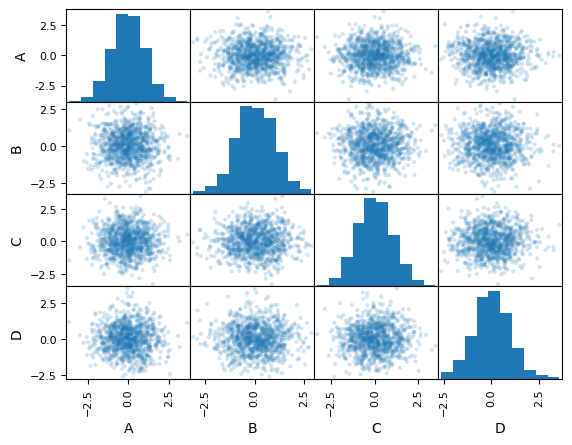

In [26]:
df = pd.DataFrame(np.random.randn(1000, 4), columns=['A','B','C','D'])
pd.plotting.scatter_matrix(df, alpha=0.2)